# THE ANALYSIS:


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('TCG_cards_near_mint_data2_final.xlsx')

#df.head()


In [3]:
# Filter the DataFrame to keep only sets where the 'Precise Pull' column has non-NaN values
filtered_df = df.groupby('set_name').filter(lambda group: group['Precise Pull'].notna().any())

# Display the resulting DataFrame
filtered_df.head()

,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,Imprecise Pull,Precise Pull
2090,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,$0.06,champions-path,1.0,1.0
2091,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,$0.07,champions-path,NaN,NaN
2092,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,$0.22,champions-path,NaN,NaN
2093,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,$0.04,champions-path,NaN,NaN
2094,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,$0.17,champions-path,NaN,NaN


In [4]:
unique_set_count = filtered_df['set_name'].nunique()
unique_set_count

39

... there is trainer gallery and shiny vault etc..

In [5]:
unique_set_names = filtered_df['set_name'].unique()
print(unique_set_names)

['champions-path' 'crown-zenith' 'crown-zenith-galarian-gallery'
 'hidden-fates-shiny-vault' 'hidden-fates' 'shining-fates'
 'shining-fates-shiny-vault' 'shining-legends' 'sm-base-set'
 'sm-burning-shadows' 'sm-celestial-storm' 'sm-cosmic-eclipse'
 'sm-crimson-invasion' 'sm-forbidden-light' 'sm-guardians-rising'
 'sm-lost-thunder' 'sm-team-up' 'sm-ultra-prism' 'sm-unbroken-bonds'
 'sm-unified-minds' 'sv-paldean-fates' 'sv-scarlet-and-violet-151'
 'sv01-scarlet-and-violet-base-set' 'sv02-paldea-evolved'
 'sv03-obsidian-flames' 'sv04-paradox-rift' 'sv05-temporal-forces'
 'sv06-twilight-masquerade' 'sv07-stellar-crown'
 'swsh01-sword-and-shield-base-set' 'swsh02-rebel-clash'
 'swsh03-darkness-ablaze' 'swsh07-evolving-skies'
 'swsh10-astral-radiance-trainer-gallery' 'swsh10-astral-radiance'
 'swsh11-lost-origin-trainer-gallery' 'swsh11-lost-origin'
 'swsh12-silver-tempest' 'swsh12-silver-tempest-trainer-gallery']


In [6]:
import pandas as pd

# Mapping function to group `trainer-gallery` and `shiny-vault` under their main set names
def group_set_names(set_name):
    if 'trainer-gallery' in set_name:
        return set_name.replace('-trainer-gallery', '')
    elif 'shiny-vault' in set_name:
        return set_name.replace('-shiny-vault', '')
    elif 'galarian-gallery' in set_name:
        return set_name.replace('-galarian-gallery', '')
    return set_name

# Apply the mapping function to create a new column
filtered_df['set_name_grouped'] = filtered_df['set_name'].apply(group_set_names)

# Display unique values in the new grouped column
grouped_set_names = filtered_df['set_name_grouped'].unique()
print(grouped_set_names)


['champions-path' 'crown-zenith' 'hidden-fates' 'shining-fates'
 'shining-legends' 'sm-base-set' 'sm-burning-shadows' 'sm-celestial-storm'
 'sm-cosmic-eclipse' 'sm-crimson-invasion' 'sm-forbidden-light'
 'sm-guardians-rising' 'sm-lost-thunder' 'sm-team-up' 'sm-ultra-prism'
 'sm-unbroken-bonds' 'sm-unified-minds' 'sv-paldean-fates'
 'sv-scarlet-and-violet-151' 'sv01-scarlet-and-violet-base-set'
 'sv02-paldea-evolved' 'sv03-obsidian-flames' 'sv04-paradox-rift'
 'sv05-temporal-forces' 'sv06-twilight-masquerade' 'sv07-stellar-crown'
 'swsh01-sword-and-shield-base-set' 'swsh02-rebel-clash'
 'swsh03-darkness-ablaze' 'swsh07-evolving-skies' 'swsh10-astral-radiance'
 'swsh11-lost-origin' 'swsh12-silver-tempest']


In [7]:
grouped_unique_set_count = filtered_df['set_name_grouped'].nunique()
grouped_unique_set_count

33

perfect, now we have all the sets properly grouped (including vaults and galleries)..

In [8]:
# Reset the index of the DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Display the DataFrame to confirm the new index
#filtered_df.head()


In [9]:
# Remove the dollar sign and convert the price column to numeric
filtered_df['price'] = filtered_df['price'].replace({r'\$': ''}, regex=True).astype(float)

# Display the DataFrame to confirm the conversion
filtered_df.head()


,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,Imprecise Pull,Precise Pull,set_name_grouped
0,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,0.06,champions-path,1.0,1.0,champions-path
1,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,0.07,champions-path,NaN,NaN,champions-path
2,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,0.22,champions-path,NaN,NaN,champions-path
3,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,0.04,champions-path,NaN,NaN,champions-path
4,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,0.17,champions-path,NaN,NaN,champions-path


In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11285 entries, 0 to 11284
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   card_name         11285 non-null  object 
 1   card_link         11285 non-null  object 
 2   image_link        11285 non-null  object 
 3   printing          11285 non-null  object 
 4   condition         11285 non-null  object 
 5   rarity            11285 non-null  object 
 6   card_number       11198 non-null  object 
 7   price             11285 non-null  float64
 8   set_name          11285 non-null  object 
 9   Imprecise Pull    791 non-null    float64
 10  Precise Pull      2394 non-null   float64
 11  set_name_grouped  11285 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.0+ MB


In [11]:
# Rename the columns
filtered_df = filtered_df.rename(columns={
    'Precise Pull': 'precise_pull',
    'Imprecise Pull': 'imprecise_pull'
})

# Display the DataFrame to confirm the renaming
filtered_df.head()


,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,imprecise_pull,precise_pull,set_name_grouped
0,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,0.06,champions-path,1.0,1.0,champions-path
1,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,0.07,champions-path,NaN,NaN,champions-path
2,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,0.22,champions-path,NaN,NaN,champions-path
3,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,0.04,champions-path,NaN,NaN,champions-path
4,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,0.17,champions-path,NaN,NaN,champions-path


In [12]:
filtered_df.describe()

,price,imprecise_pull,precise_pull
count,11285.000000,791.000000,2394.000000
mean,2.772173,0.046094,0.018003
std,19.318656,0.199191,0.116182
min,0.020000,0.001100,0.000500
25%,0.090000,0.002100,0.001837
50%,0.200000,0.003200,0.002433
75%,0.590000,0.006400,0.006481
max,975.130000,1.000000,1.000000


In [13]:
# Display unique values in the printing
grouped_set_names = filtered_df['printing'].unique()
print(grouped_set_names)

['Normal' 'Reverse Holofoil' 'Holofoil']


In [14]:
# Display unique values in the rarity
grouped_set_names = filtered_df['rarity'].unique()
print(grouped_set_names)

['Code Card' 'Common' 'Holo Rare' 'Secret Rare' 'Ultra Rare' 'Uncommon'
 'Radiant Rare' 'Rare' 'Shiny Holo Rare' 'Amazing Rare' 'Prism Rare'
 'Double Rare' 'Hyper Rare' 'Illustration Rare' 'Shiny Rare'
 'Shiny Ultra Rare' 'Special Illustration Rare' 'ACE SPEC Rare']


In [15]:
# Dictionary mapping set names to their release dates from: https://www.pokemon.com/us/pokemon-tcg/trading-card-expansions
set_release_dates = {
    'sm-base-set': '2017-02-03',
    'sm-guardians-rising': '2017-05-05',
    'sm-burning-shadows': '2017-08-04',
    'shining-legends': '2017-10-06',
    'sm-crimson-invasion': '2017-11-03',
    'sm-ultra-prism': '2018-02-02',
    'sm-forbidden-light': '2018-05-04',
    'sm-celestial-storm': '2018-08-03',
    'dragon-majesty': '2018-09-07',
    'sm-lost-thunder': '2018-11-02',
    'sm-team-up': '2019-02-01',
    'detective-pikachu': '2019-03-29',
    'sm-unbroken-bonds': '2019-05-03',
    'sm-unified-minds': '2019-08-02',
    'hidden-fates': '2019-08-23',
    'sm-cosmic-eclipse': '2019-11-01',
    'swsh01-sword-and-shield-base-set': '2020-02-07',
    'swsh02-rebel-clash': '2020-05-01',
    'swsh03-darkness-ablaze': '2020-08-14',
    'champions-path': '2020-09-25',
    'swsh04-vivid-voltage': '2020-11-13',
    'shining-fates': '2021-02-19',
    'swsh05-battle-styles': '2021-03-19',
    'swsh06-chilling-reign': '2021-06-18',
    'swsh07-evolving-skies': '2021-08-27',
    'celebrations': '2021-10-08',
    'swsh08-fusion-strike': '2021-11-12',
    'swsh09-brilliant-stars': '2022-02-25',
    'swsh10-astral-radiance': '2022-05-27',
    'pokemon-go': '2022-07-01',
    'swsh11-lost-origin': '2022-09-09',
    'swsh12-silver-tempest': '2022-11-11',
    'crown-zenith': '2023-01-20',
    'sv01-scarlet-and-violet-base-set': '2023-03-31',
    'sv02-paldea-evolved': '2023-06-09',
    'sv03-obsidian-flames': '2023-08-11',
    'sv-scarlet-and-violet-151': '2023-09-22',
    'sv04-paradox-rift': '2023-11-03',
    'sv-paldean-fates': '2024-01-26',
    'sv05-temporal-forces': '2024-03-22',
    'sv06-twilight-masquerade': '2024-05-24',
    'sv07-stellar-crown': '2024-09-13',
    'sv08-shrouded-fable': '2024-08-02',
    'sv09-surging-sparks': '2024-11-08',
    'sv10-prismatic-evolutions': '2025-01-17',
}

# Adding release dates to the DataFrame
filtered_df['release_date'] = filtered_df['set_name_grouped'].map(set_release_dates)

# Displaying the first few rows to confirm
print(filtered_df[['set_name_grouped', 'release_date']].head())


  set_name_grouped release_date
0   champions-path   2020-09-25
1   champions-path   2020-09-25
2   champions-path   2020-09-25
3   champions-path   2020-09-25
4   champions-path   2020-09-25


In [16]:
filtered_df

,card_name,card_link,image_link,printing,condition,rarity,card_number,price,set_name,imprecise_pull,precise_pull,set_name_grouped,release_date
0,Code Card - Champion's Path Booster Pack,/product/251544/pokemon-champion-s-path-code-c...,https://tcgplayer-cdn.tcgplayer.com/product/25...,Normal,Near Mint,Code Card,NaN,0.06,champions-path,1.0,1.0,champions-path,2020-09-25
1,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,02/73,0.07,champions-path,NaN,NaN,champions-path,2020-09-25
2,Weedle,/product/222995/pokemon-champion-s-path-weedle,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,02/73,0.22,champions-path,NaN,NaN,champions-path,2020-09-25
3,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Normal,Near Mint,Common,03/73,0.04,champions-path,NaN,NaN,champions-path,2020-09-25
4,Kakuna,/product/222997/pokemon-champion-s-path-kakuna,https://tcgplayer-cdn.tcgplayer.com/product/22...,Reverse Holofoil,Near Mint,Common,03/73,0.17,champions-path,NaN,NaN,champions-path,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11280,Worker,/product/451815/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Reverse Holofoil,Near Mint,Uncommon,167/195,0.26,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11281,Regenerative Energy,/product/451816/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Normal,Near Mint,Uncommon,168/195,0.09,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11282,Regenerative Energy,/product/451816/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Reverse Holofoil,Near Mint,Uncommon,168/195,0.10,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11
11283,V Guard Energy,/product/451817/pokemon-swsh12-silver-tempest-...,https://tcgplayer-cdn.tcgplayer.com/product/45...,Normal,Near Mint,Uncommon,169/195,0.09,swsh12-silver-tempest,NaN,NaN,swsh12-silver-tempest,2022-11-11


### Check for how influential the reverse holo/holo is on the expected value values:

In [17]:
def calculate_booster_pack_value(df):
    """
    Calculate the expected value of a booster pack for each set.

    Parameters:
    - df (pd.DataFrame): DataFrame containing card data with columns 'set_name_grouped', 'price', 'precise_pull', 'rarity'.

    Returns:
    - pd.DataFrame: DataFrame with columns ['set_name_grouped', 'expected_value'].
    """
    results = []

    # Group by set
    grouped = df.groupby('set_name_grouped')

    for set_name, group in grouped:
        # Step 1: Bulk cards (cards with NaN pull rates)
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10

        # Step 2: Cards with pull rates (including code cards)
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        # Step 3: Total expected value
        expected_value = bulk_value + pull_rate_value

        # Append result for this set
        results.append({'set_name_grouped': set_name, 'expected_value': expected_value, 'bulk_value': bulk_value, 'pull_rate_value': pull_rate_value})

    # Convert results to a DataFrame
    return pd.DataFrame(results)


In [18]:


# Calculate the expected value of booster packs
booster_pack_values = calculate_booster_pack_value(filtered_df)

# Display the results
booster_pack_values


,set_name_grouped,expected_value,bulk_value,pull_rate_value
0,champions-path,2.987305,1.418519,1.568787
1,crown-zenith,4.064795,1.687281,2.377514
2,hidden-fates,7.267429,2.263393,5.004036
3,shining-fates,2.439886,1.168478,1.271408
4,shining-legends,6.988347,3.110833,3.877514
5,sm-base-set,3.150060,2.229259,0.920801
6,sm-burning-shadows,3.524877,2.059914,1.464964
7,sm-celestial-storm,6.941998,4.758759,2.183239
8,sm-cosmic-eclipse,8.871870,4.598964,4.272906
9,sm-crimson-invasion,3.673729,2.875000,0.798729


In [19]:
def calculate_booster_pack_value2(df):
    """
    Calculate the expected value of a booster pack for each set,
    and include the influence and weighted contribution of Reverse Holo and Holofoil cards.

    Parameters:
    - df (pd.DataFrame): DataFrame with columns 'set_name_grouped', 'price', 'precise_pull', 'printing'.

    Returns:
    - pd.DataFrame: One row per set with expected values, influence, and contribution measures.
    """
    results = []

    grouped = df.groupby('set_name_grouped')

    for set_name, group in grouped:
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10  # 10 cards per pack assumption

        # Subsets
        reverse_bulk = bulk_cards[bulk_cards['printing'] == 'Reverse Holofoil']
        holo_bulk = bulk_cards[bulk_cards['printing'] == 'Holofoil']
        normal_bulk = bulk_cards[~bulk_cards['printing'].isin(['Reverse Holofoil', 'Holofoil'])]

        # Counts
        n_reverse = len(reverse_bulk)
        n_holo = len(holo_bulk)
        n_normal = len(normal_bulk)
        n_total = n_reverse + n_holo + n_normal

        # Means
        μ_reverse = reverse_bulk['price'].mean() if n_reverse > 0 else 0
        μ_holo = holo_bulk['price'].mean() if n_holo > 0 else 0
        μ_normal = normal_bulk['price'].mean() if n_normal > 0 else 0
        μ_bulk_total = bulk_price_avg

        # Influence (abs + %)
        influence_reverse = μ_reverse - μ_normal if n_normal > 0 else None
        relative_influence_reverse = (
            (μ_reverse - μ_normal) / μ_normal * 100 if μ_normal > 0 else None
        )

        influence_holo = μ_holo - μ_normal if n_normal > 0 else None
        relative_influence_holo = (
            (μ_holo - μ_normal) / μ_normal * 100 if μ_normal > 0 else None
        )

        # Weighted contribution to bulk average
        weight_reverse = n_reverse / n_total if n_total > 0 else 0
        weight_holo = n_holo / n_total if n_total > 0 else 0
        weight_normal = n_normal / n_total if n_total > 0 else 0

        contribution_reverse = μ_reverse * weight_reverse
        contribution_holo = μ_holo * weight_holo
        contribution_normal = μ_normal * weight_normal

        # Check: should ≈ μ_bulk_total
        μ_bulk_weighted = contribution_reverse + contribution_holo + contribution_normal

        # Pull rate section
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        expected_value = bulk_value + pull_rate_value

        results.append({
            'set_name_grouped': set_name,
            'expected_value': expected_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value': bulk_value,
            
            #'μ_bulk_total': μ_bulk_total,
            #'μ_normal_bulk': μ_normal,
            #'μ_reverse_bulk': μ_reverse,
            #'μ_holo_bulk': μ_holo,
            #'influence_reverse_abs': influence_reverse,
            #'influence_reverse_pct': relative_influence_reverse,
            #'influence_holo_abs': influence_holo,
            #'influence_holo_pct': relative_influence_holo,
            #'weight_normal': weight_normal,
            #'weight_reverse': weight_reverse,
            #'weight_holo': weight_holo,
            'contribution_normal': contribution_normal,
            'contribution_reverse': contribution_reverse,
            'contribution_holo': contribution_holo,
            'μ_bulk_weighted_check': μ_bulk_weighted,
            'n_normal': n_normal,
            'n_reverse': n_reverse,
            'n_holo': n_holo
        })

    return pd.DataFrame(results)

# Calculate the expected value of booster packs
booster_pack_values_w_effects = calculate_booster_pack_value2(filtered_df)

# Display the results
booster_pack_values_w_effects

,set_name_grouped,expected_value,pull_rate_value,bulk_value,contribution_normal,contribution_reverse,contribution_holo,μ_bulk_weighted_check,n_normal,n_reverse,n_holo
0,champions-path,2.987305,1.568787,1.418519,0.024630,0.103056,0.014167,0.141852,44,54,10
1,crown-zenith,4.064795,2.377514,1.687281,0.020570,0.107895,0.040263,0.168728,93,112,23
2,hidden-fates,7.267429,5.004036,2.263393,0.050893,0.156875,0.018571,0.226339,50,56,6
3,shining-fates,2.439886,1.271408,1.168478,0.023261,0.081196,0.012391,0.116848,39,46,7
4,shining-legends,6.988347,3.877514,3.110833,0.059667,0.221667,0.029750,0.311083,48,60,12
5,sm-base-set,3.150060,0.920801,2.229259,0.041741,0.159815,0.021370,0.222926,119,135,16
6,sm-burning-shadows,3.524877,1.464964,2.059914,0.057586,0.129741,0.018664,0.205991,103,116,13
7,sm-celestial-storm,6.941998,2.183239,4.758759,0.092555,0.295328,0.087993,0.475876,119,137,18
8,sm-cosmic-eclipse,8.871870,4.272906,4.598964,0.092098,0.304378,0.063420,0.459896,171,193,22
9,sm-crimson-invasion,3.673729,0.798729,2.875000,0.062446,0.189457,0.035598,0.287500,80,92,12


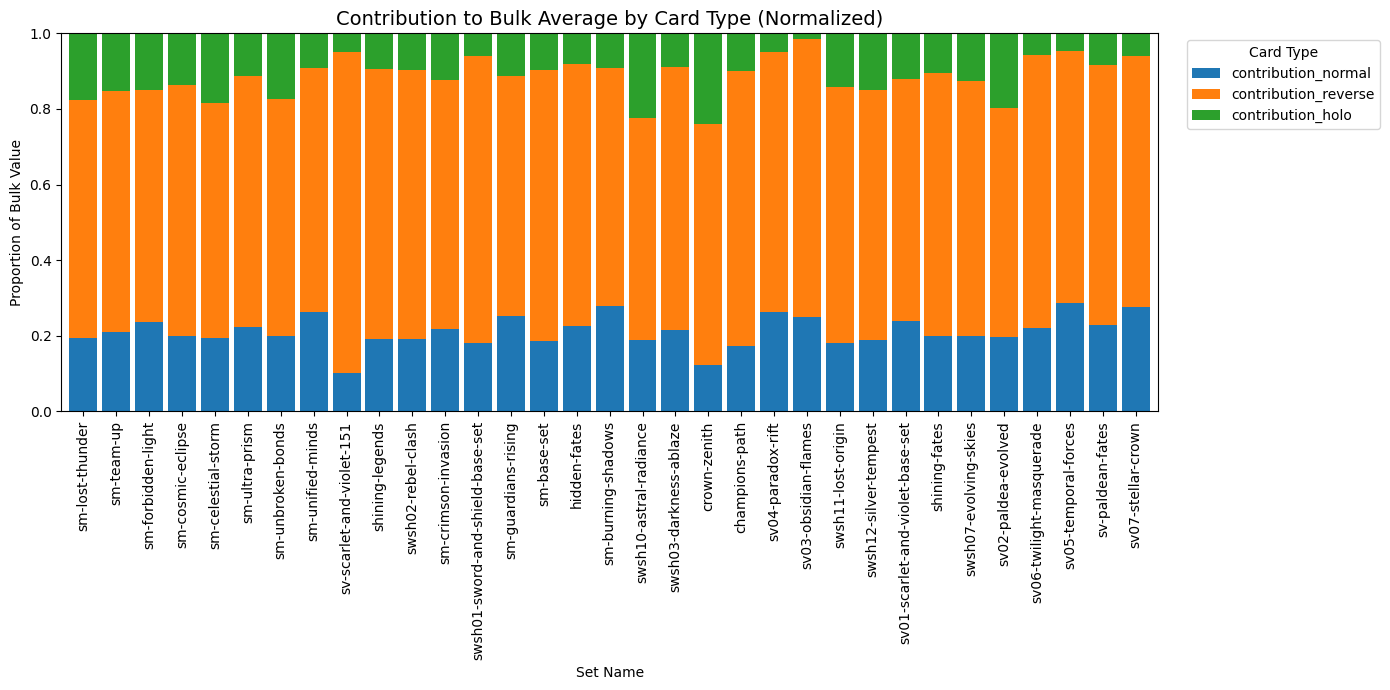

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort sets if you want (e.g. by reverse holo contribution descending)
df = booster_pack_values_w_effects.copy()
df = df.sort_values(by='contribution_reverse', ascending=False)

# Normalize the contributions so they sum to 1 per set
contrib_df = df[['set_name_grouped', 'contribution_normal', 'contribution_reverse', 'contribution_holo']].copy()
contrib_df.set_index('set_name_grouped', inplace=True)

# Normalize to 100% contribution (sum to 1 per row)
contrib_normalized = contrib_df.div(contrib_df.sum(axis=1), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

contrib_normalized.plot(kind='bar', stacked=True, ax=ax, width=0.85)

ax.set_title('Contribution to Bulk Average by Card Type (Normalized)', fontsize=14)
ax.set_ylabel('Proportion of Bulk Value')
ax.set_xlabel('Set Name')
ax.legend(title='Card Type', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


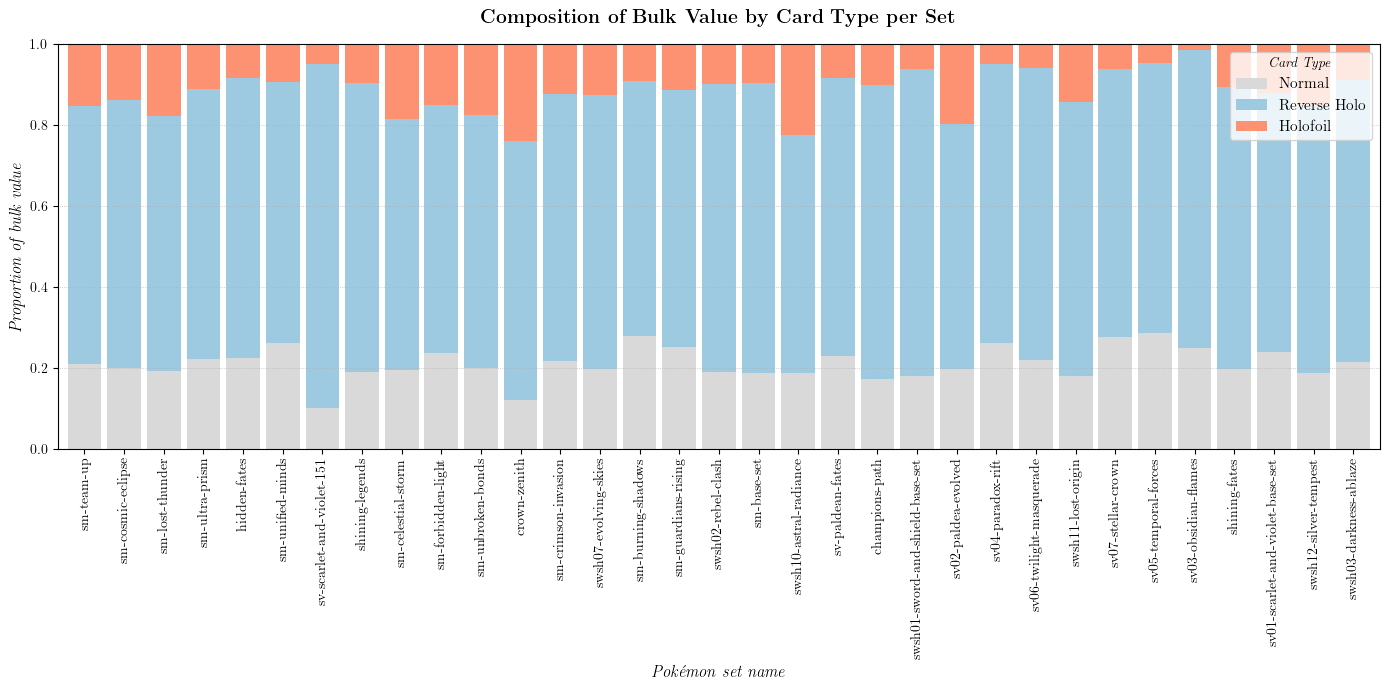

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Enable LaTeX-style plotting
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Prepare and sort data
df = booster_pack_values_w_effects.copy()
df = df.sort_values(by='expected_value', ascending=False)  # Change this line to sort by any column

# Normalize contributions
contrib_df = df[['set_name_grouped', 'contribution_normal', 'contribution_reverse', 'contribution_holo']].copy()
contrib_df.set_index('set_name_grouped', inplace=True)
contrib_normalized = contrib_df.div(contrib_df.sum(axis=1), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#d9d9d9', '#9ecae1', '#fc9272']  # soft grayscale + gentle blue/red
contrib_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.85)

ax.set_title(r'\textbf{Composition of Bulk Value by Card Type per Set}', pad=15)
ax.set_ylabel(r'\textit{Proportion of bulk value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.set_ylim(0, 1)
ax.legend(title=r'\textit{Card Type}', labels=['Normal', 'Reverse Holo', 'Holofoil'], loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## now the more detailed bulk value decomposition:


In [23]:
import re

def calculate_booster_pack_value_detailed_final_with_check(df):
    """
    Calculates expected value and detailed contribution breakdown with fixed rarity logic and energy detection.
    Also tracks any bulk cards that were not included in any category.
    """
    results = []
    omitted_cards = []  # 🧾 Store cards that were skipped
    grouped = df.groupby('set_name_grouped')

    rare_types = [
        'Rare', 'Holo Rare', 'Ultra Rare', 'Secret Rare', 'Radiant Rare', 'Shiny Holo Rare',
        'Amazing Rare', 'Prism Rare', 'Double Rare', 'Hyper Rare', 'Illustration Rare',
        'Shiny Rare', 'Shiny Ultra Rare', 'Special Illustration Rare', 'ACE SPEC Rare'
    ]

    energy_keywords = [
        'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Grass Energy',
        'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
    ]
    energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

    for set_name, group in grouped:
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10

        energy_cards = bulk_cards[
            (bulk_cards['card_name'].str.contains(energy_pattern, case=False, na=False)) &
            (bulk_cards['rarity'] == 'Common')
        ]
        bulk_non_energy = bulk_cards.drop(index=energy_cards.index)

        categories = {
            'common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Normal')],
            'uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Normal')],
            'rare_non_holo': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Normal')],
            'holo_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Holofoil')],
            'reverse_common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'energy': energy_cards
        }

        # --- Check for uncategorized bulk cards ---
        all_categorized_indices = pd.Index([])
        for cat_df in categories.values():
            all_categorized_indices = all_categorized_indices.union(cat_df.index)

        uncategorized = bulk_cards.loc[~bulk_cards.index.isin(all_categorized_indices)].copy()
        if not uncategorized.empty:
            uncategorized['set_name_grouped'] = set_name
            omitted_cards.append(uncategorized)

        # --- Contributions ---
        total_bulk_cards = sum(len(cat) for cat in categories.values())
        contribs = {}
        for key, cat_df in categories.items():
            n = len(cat_df)
            μ = cat_df['price'].mean() if n > 0 else 0
            w = n / total_bulk_cards if total_bulk_cards > 0 else 0
            contribs[f'contribution_{key}'] = μ * w

        μ_bulk_weighted = sum(contribs.values())

        # Pull-rate value
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        expected_value = bulk_value + pull_rate_value

        result = {
            'set_name_grouped': set_name,
            'expected_value': expected_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value': bulk_value,
            'μ_bulk_weighted_check': μ_bulk_weighted
        }
        result.update(contribs)
        results.append(result)

    final_df = pd.DataFrame(results)

    # Combine omitted cards across all sets
    omitted_df = pd.concat(omitted_cards, ignore_index=True) if omitted_cards else pd.DataFrame()

    return final_df, omitted_df


booster_pack_values, omitted_cards_df = calculate_booster_pack_value_detailed_final_with_check(filtered_df)

# Show just the sets where cards were missed
if not omitted_cards_df.empty:
    print("Cards omitted from all defined categories:")
    display(omitted_cards_df[['set_name_grouped', 'card_name', 'printing', 'rarity', 'price']])
else:
    print("All cards were correctly categorized!")


Cards omitted from all defined categories:


,set_name_grouped,card_name,printing,rarity,price
0,sv01-scarlet-and-violet-base-set,Basic Darkness Energy (Cosmos Holo),Holofoil,Common,0.63
1,sv02-paldea-evolved,Frigibax - 058/193 (Holiday Calendar),Holofoil,Common,2.31


-> so the Darkness Energy added to the list of energies, and frigibax deleted completely..:



In [24]:
# Remove the Frigibax Holiday Calendar card from the dataset
filtered_df = filtered_df[filtered_df['card_name'] != 'Frigibax - 058/193 (Holiday Calendar)']


In [25]:
import re

def calculate_booster_pack_value_detailed_final(df):
    """
    Calculates expected value and detailed contribution breakdown with fixed rarity logic,
    energy detection, and adds all counts needed for EV formula weighting.
    """
    results = []
    grouped = df.groupby('set_name_grouped')

    rare_types = [
        'Rare', 'Holo Rare', 'Ultra Rare', 'Secret Rare', 'Radiant Rare', 'Shiny Holo Rare',
        'Amazing Rare', 'Prism Rare', 'Double Rare', 'Hyper Rare', 'Illustration Rare',
        'Shiny Rare', 'Shiny Ultra Rare', 'Special Illustration Rare', 'ACE SPEC Rare'
    ]

    energy_keywords = [
        'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Darkness Energy',
        'Grass Energy', 'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
    ]
    energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

    for set_name, group in grouped:
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value = bulk_price_avg * 10

        # Filter energy cards
        energy_cards = bulk_cards[
            (bulk_cards['card_name'].str.contains(energy_pattern, case=False, na=False)) &
            (bulk_cards['rarity'] == 'Common')
        ]

        bulk_non_energy = bulk_cards.drop(index=energy_cards.index)

        # Specific categories
        categories = {
            'common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Normal')],
            'uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Normal')],
            'rare_non_holo': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Normal')],
            'holo_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Holofoil')],
            'reverse_common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'energy': energy_cards
        }

        total_bulk_cards = sum(len(cat) for cat in categories.values())

        contribs = {}
        counts = {}

        for key, cat_df in categories.items():
            n = len(cat_df)
            μ = cat_df['price'].mean() if n > 0 else 0
            w = n / total_bulk_cards if total_bulk_cards > 0 else 0
            contribs[f'contribution_{key}'] = μ * w
            counts[f'n_{key}'] = n  # Store count

        # Total reverse holos and total rare slot cards
        counts['n_rh_total'] = (
            counts.get('n_reverse_common', 0) +
            counts.get('n_reverse_uncommon', 0) +
            counts.get('n_reverse_rare', 0)
        )
        counts['n_rare_total'] = (
            counts.get('n_rare_non_holo', 0) +
            counts.get('n_holo_rare', 0)
        )

        μ_bulk_weighted = sum(contribs.values())

        # Pull rate EV
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        expected_value = bulk_value + pull_rate_value

        result = {
            'set_name_grouped': set_name,
            'expected_value': expected_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value': bulk_value,
            'μ_bulk_weighted_check*10': μ_bulk_weighted * 10,
            'μ_bulk_weighted_check': μ_bulk_weighted
        }
        result.update(contribs)
        result.update(counts)
        results.append(result)

    return pd.DataFrame(results)



booster_pack_values_fixed = calculate_booster_pack_value_detailed_final(filtered_df)
booster_pack_values_fixed


,set_name_grouped,expected_value,pull_rate_value,bulk_value,μ_bulk_weighted_check*10,μ_bulk_weighted_check,contribution_common,contribution_uncommon,contribution_rare_non_holo,contribution_holo_rare,...,n_common,n_uncommon,n_rare_non_holo,n_holo_rare,n_reverse_common,n_reverse_uncommon,n_reverse_rare,n_energy,n_rh_total,n_rare_total
0,champions-path,2.987305,1.568787,1.418519,1.418519,0.141852,0.010463,0.014167,0.000000,0.014167,...,21,23,0,10,21,23,10,0,54,10
1,crown-zenith,4.064795,2.377514,1.687281,1.687281,0.168728,0.006842,0.006579,0.007149,0.040263,...,42,29,22,23,42,29,41,0,112,45
2,hidden-fates,7.267429,5.004036,2.263393,2.263393,0.226339,0.013393,0.012143,0.025357,0.018571,...,18,17,15,6,18,17,21,0,56,21
3,shining-fates,2.439886,1.271408,1.168478,1.168478,0.116848,0.008696,0.005870,0.008696,0.012391,...,18,13,8,7,18,13,15,0,46,15
4,shining-legends,6.988347,3.877514,3.110833,3.110833,0.311083,0.024750,0.034917,0.000000,0.029750,...,23,25,0,12,23,25,12,0,60,12
5,sm-base-set,3.150060,0.920801,2.229259,2.229259,0.222926,0.010407,0.020222,0.008370,0.021370,...,44,49,17,16,44,49,33,18,126,33
6,sm-burning-shadows,3.524877,1.464964,2.059914,2.059914,0.205991,0.013017,0.025431,0.019138,0.018664,...,39,39,25,13,39,39,38,0,116,38
7,sm-celestial-storm,6.941998,2.183239,4.758759,4.758759,0.475876,0.019927,0.052007,0.020620,0.087993,...,40,62,17,18,40,62,35,0,137,35
8,sm-cosmic-eclipse,8.871870,4.272906,4.598964,4.598964,0.459896,0.020130,0.042617,0.029352,0.063420,...,67,66,38,22,67,66,60,0,193,60
9,sm-crimson-invasion,3.673729,0.798729,2.875000,2.875000,0.287500,0.015707,0.024402,0.022337,0.035598,...,34,26,20,12,34,26,32,0,92,32


In [86]:
import pandas as pd
import re

def calculate_booster_pack_value_detailed_final2(df):
    """
    Calculates expected value and detailed contribution breakdown with fixed rarity logic,
    energy detection, and adds all counts needed for EV formula weighting.
    Includes both original EV and adjusted EV based on pack structure (SV vs. pre-SV).
    """
    results = []
    grouped = df.groupby('set_name_grouped')

    rare_types = [
        'Rare', 'Holo Rare', 'Ultra Rare', 'Secret Rare', 'Radiant Rare', 'Shiny Holo Rare',
        'Amazing Rare', 'Prism Rare', 'Double Rare', 'Hyper Rare', 'Illustration Rare',
        'Shiny Rare', 'Shiny Ultra Rare', 'Special Illustration Rare', 'ACE SPEC Rare'
    ]

    energy_keywords = [
        'Fire Energy', 'Water Energy', 'Fighting Energy', 'Dark Energy', 'Darkness Energy',
        'Grass Energy', 'Lightning Energy', 'Psychic Energy', 'Metal Energy', 'Fairy Energy'
    ]
    energy_pattern = '|'.join(re.escape(word) for word in energy_keywords)

    for set_name, group in grouped:
        # Identify SV era
        is_sv_era = set_name.startswith('sv')

        # Filter cards
        bulk_cards = group[group['precise_pull'].isna()]
        bulk_price_avg = bulk_cards['price'].mean() if not bulk_cards.empty else 0
        bulk_value_simple = bulk_price_avg * 10  # original estimate

        energy_cards = bulk_cards[
            (bulk_cards['card_name'].str.contains(energy_pattern, case=False, na=False)) &
            (bulk_cards['rarity'] == 'Common')
        ]
        bulk_non_energy = bulk_cards.drop(index=energy_cards.index)

        # Define categories
        categories = {
            'common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Normal')],
            'uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Normal')],
            'rare_non_holo': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Normal')],
            'holo_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Holofoil')],
            'reverse_common': bulk_non_energy[(bulk_non_energy['rarity'] == 'Common') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_uncommon': bulk_non_energy[(bulk_non_energy['rarity'] == 'Uncommon') & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'reverse_rare': bulk_non_energy[(bulk_non_energy['rarity'].isin(rare_types)) & (bulk_non_energy['printing'] == 'Reverse Holofoil')],
            'energy': energy_cards
        }

        total_bulk_cards = sum(len(cat) for cat in categories.values())
        contribs = {}
        counts = {}

        for key, cat_df in categories.items():
            n = len(cat_df)
            μ = cat_df['price'].mean() if n > 0 else 0
            w = n / total_bulk_cards if total_bulk_cards > 0 else 0
            contribs[f'contribution_{key}'] = μ * w
            counts[f'n_{key}'] = n

        # Totals for formula weighting
        counts['n_rh_total'] = (
            counts.get('n_reverse_common', 0) +
            counts.get('n_reverse_uncommon', 0) +
            counts.get('n_reverse_rare', 0)
        )
        counts['n_rare_total'] = (
            counts.get('n_rare_non_holo', 0) +
            counts.get('n_holo_rare', 0)
        )

        μ_bulk_weighted = sum(contribs.values())

        # Pull rate EV
        cards_with_pull_rates = group[group['precise_pull'].notna()]
        pull_rate_value = (cards_with_pull_rates['precise_pull'] * cards_with_pull_rates['price']).sum()

        # Means
        μ_common = categories['common']['price'].mean() if counts['n_common'] > 0 else 0
        μ_uncommon = categories['uncommon']['price'].mean() if counts['n_uncommon'] > 0 else 0
        μ_energy = categories['energy']['price'].mean() if counts['n_energy'] > 0 else 0

        μ_reverse_common = categories['reverse_common']['price'].mean() if counts['n_reverse_common'] > 0 else 0
        μ_reverse_uncommon = categories['reverse_uncommon']['price'].mean() if counts['n_reverse_uncommon'] > 0 else 0
        μ_reverse_rare = categories['reverse_rare']['price'].mean() if counts['n_reverse_rare'] > 0 else 0

        μ_nonholo_rare = categories['rare_non_holo']['price'].mean() if counts['n_rare_non_holo'] > 0 else 0
        μ_holo_rare = categories['holo_rare']['price'].mean() if counts['n_holo_rare'] > 0 else 0

        # Weighted rare slot
        total_rare_slot = counts['n_rare_total']
        rare_slot_value = (
            (counts['n_holo_rare'] / total_rare_slot * μ_holo_rare if total_rare_slot > 0 else 0) +
            (counts['n_rare_non_holo'] / total_rare_slot * μ_nonholo_rare if total_rare_slot > 0 else 0)
        )

        # Weighted reverse holo slot(s)
        total_rh = counts['n_rh_total']
        reverse_holo_value = (
            (counts['n_reverse_rare'] / total_rh * μ_reverse_rare if total_rh > 0 else 0) +
            (counts['n_reverse_uncommon'] / total_rh * μ_reverse_uncommon if total_rh > 0 else 0) +
            (counts['n_reverse_common'] / total_rh * μ_reverse_common if total_rh > 0 else 0)
        )

        # Final formula-based bulk value
        if is_sv_era:
            bulk_value_formula = (
                rare_slot_value +
                2 * reverse_holo_value +
                3 * μ_uncommon +
                4 * μ_common +
                μ_energy
            )
        else:
            bulk_value_formula = (
                rare_slot_value +
                reverse_holo_value +
                3 * μ_uncommon +
                5 * μ_common +
                μ_energy
            )

        expected_value_formula = pull_rate_value + bulk_value_formula

        # Final results row
        result = {
            'set_name_grouped': set_name,
            'is_sv_era': is_sv_era,

            # Original estimate
            'expected_value': bulk_value_simple + pull_rate_value,
            'pull_rate_value': pull_rate_value,
            'bulk_value_simple': bulk_value_simple,
            'μ_bulk_weighted_check': μ_bulk_weighted,
            'μ_bulk_weighted_check*10': μ_bulk_weighted * 10,

            # New formula-based EV
            'expected_value_formula': expected_value_formula,
            'bulk_value_formula': bulk_value_formula,
            'rare_slot_value': rare_slot_value,
            'reverse_holo_value': reverse_holo_value,
            'new_ev_check': pull_rate_value + bulk_value_formula
          

        
        }

        result.update(contribs)
        result.update(counts)
        results.append(result)

    return pd.DataFrame(results)


booster_pack_values_detailed_final_FOR_FINAL_GRAPH = calculate_booster_pack_value_detailed_final2(filtered_df)



booster_pack_values_detailed_final2 = calculate_booster_pack_value_detailed_final2(filtered_df)
booster_pack_values_detailed_final2

# Step 1: Extract one release_date per set from filtered_df
release_dates = (
    filtered_df[['set_name_grouped', 'release_date']]
    .drop_duplicates(subset='set_name_grouped')
)

# Step 2: Merge with booster_pack_values_detailed_final2
booster_pack_values_detailed_final2 = booster_pack_values_detailed_final2.merge(
    release_dates,
    on='set_name_grouped',
    how='left'
)


display_columns = [
    'set_name_grouped',
    'expected_value',         # original EV
    'pull_rate_value',        # component of original EV
    'bulk_value_simple',      # component of original EV
    'μ_bulk_weighted_check*10',
    'expected_value_formula', # formula-based EV
    'new_ev_check',
    'bulk_value_formula',      # formula-based bulk value
    'release_date'
    
]

booster_pack_values_detailed_final2[display_columns]



,set_name_grouped,expected_value,pull_rate_value,bulk_value_simple,μ_bulk_weighted_check*10,expected_value_formula,new_ev_check,bulk_value_formula,release_date
0,champions-path,2.987305,1.568787,1.418519,1.418519,2.396511,2.396511,0.827724,2020-09-25
1,crown-zenith,4.064795,2.377514,1.687281,1.687281,3.178266,3.178266,0.800752,2023-01-20
2,hidden-fates,7.267429,5.004036,2.263393,2.263393,6.208739,6.208739,1.204702,2019-08-23
3,shining-fates,2.439886,1.271408,1.168478,1.168478,1.909970,1.909970,0.638562,2021-02-19
4,shining-legends,6.988347,3.877514,3.110833,3.110833,5.766799,5.766799,1.889286,2017-10-06
5,sm-base-set,3.150060,0.920801,2.229259,2.229259,2.642738,2.642738,1.721937,2017-02-03
6,sm-burning-shadows,3.524877,1.464964,2.059914,2.059914,2.796261,2.796261,1.331298,2017-08-04
7,sm-celestial-storm,6.941998,2.183239,4.758759,4.758759,4.996197,4.996197,2.812959,2018-08-03
8,sm-cosmic-eclipse,8.871870,4.272906,4.598964,4.598964,6.806074,6.806074,2.533168,2019-11-01
9,sm-crimson-invasion,3.673729,0.798729,2.875000,2.875000,2.453844,2.453844,1.655115,2017-11-03


## now the visualisation of the Booster Pack Value decomposition: 
 


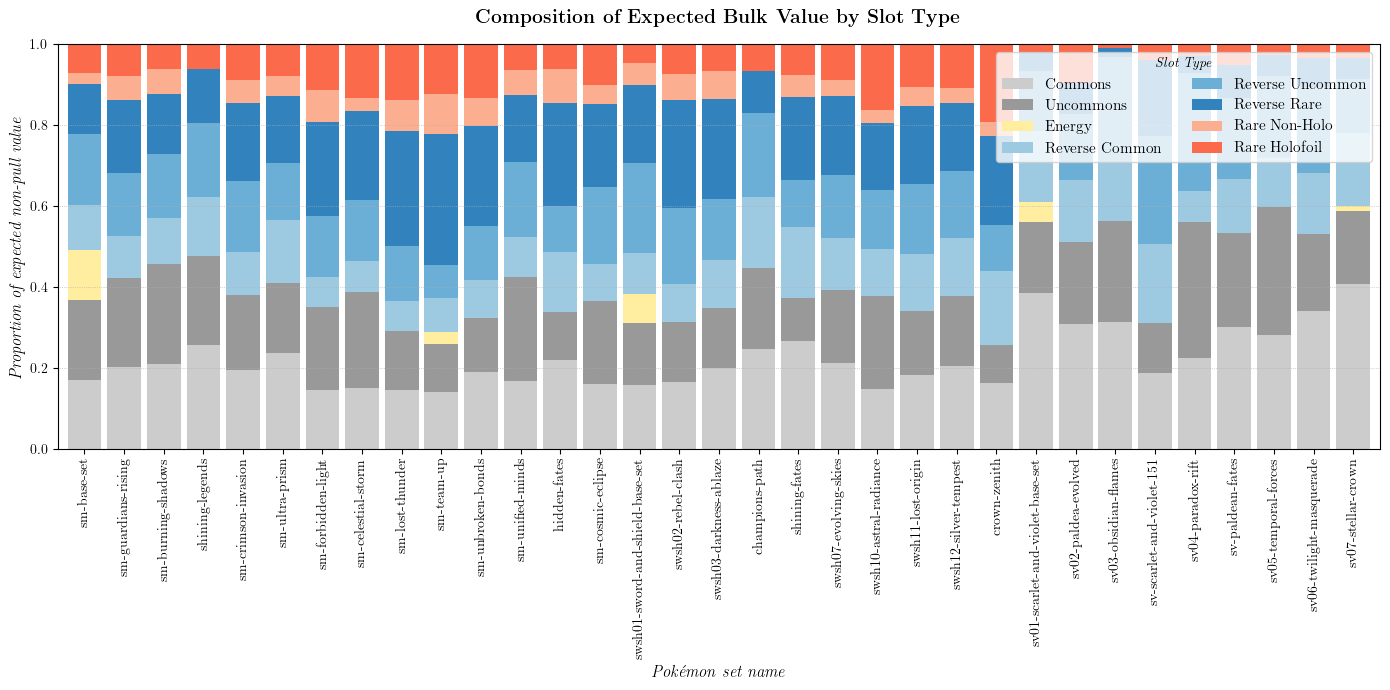

In [ ]:
# Extract per-card-type contribution columns from your EV dataframe
cols = [
    'contribution_common', 'contribution_uncommon', 'contribution_energy',
    'contribution_rare_non_holo', 'contribution_holo_rare',
    'contribution_reverse_common', 'contribution_reverse_uncommon', 'contribution_reverse_rare'
]

# Ensure all columns are present
df_slot = booster_pack_values_detailed_final2[['set_name_grouped'] + cols].copy()
df_slot.set_index('set_name_grouped', inplace=True)

# Multiply each slot by its frequency per pack (based on SV or pre-SV rules)
def adjust_slots(row):
    is_sv = row.get('is_sv_era', False)
    return pd.Series({
        'Commons': 4 * row['contribution_common'] if is_sv else 5 * row['contribution_common'],
        'Uncommons': 3 * row['contribution_uncommon'],
        'Energy': row['contribution_energy'],
        'Reverse Common': 1 * row['contribution_reverse_common'] if not is_sv else 2 * row['contribution_reverse_common'],
        'Reverse Uncommon': 1 * row['contribution_reverse_uncommon'] if not is_sv else 2 * row['contribution_reverse_uncommon'],
        'Reverse Rare': 1 * row['contribution_reverse_rare'] if not is_sv else 2 * row['contribution_reverse_rare'],
        'Rare Non-Holo': row['contribution_rare_non_holo'],
        'Rare Holofoil': row['contribution_holo_rare']
    })

df_plot = df_slot.apply(adjust_slots, axis=1)

# Normalize per set (row-wise)
df_normalized = df_plot.div(df_plot.sum(axis=1), axis=0)

# Get sorted index based on original EV dataframe
# Make sure release_date is datetime
booster_pack_values_detailed_final2['release_date'] = pd.to_datetime(booster_pack_values_detailed_final2['release_date'])

# Sort by release date
sorted_index = booster_pack_values_detailed_final2.sort_values(by='release_date')['set_name_grouped']

df_normalized = df_normalized.loc[sorted_index]

# Define soft color palette
colors = [
    '#cccccc',  # Commons
    '#999999',  # Uncommons
    '#ffeda0',  # Energy
    '#9ecae1',  # RH Common
    '#6baed6',  # RH Uncommon
    '#3182bd',  # RH Rare
    '#fcae91',  # Rare Non-Holo
    '#fb6a4a',  # Rare Holofoil
]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
df_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.85)

ax.set_title(r'\textbf{Composition of Expected Bulk Value by Slot Type}', pad=15)
ax.set_ylabel(r'\textit{Proportion of expected non-pull value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.set_ylim(0, 1)
ax.legend(title=r'\textit{Slot Type}', loc='upper right', ncol=2)
ax.grid(axis='y', linestyle=':', linewidth=0.5)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [42]:
# expected value from bulk vs pulls - normalised chart:
'''

df = booster_pack_values_detailed_final.copy()

# Total formula EV 
df['total_ev'] = df['expected_value_formula']
df['pull_proportion'] = df['pull_rate_value'] / df['total_ev']
df['bulk_proportion'] = 1 - df['pull_proportion']

# Create proportion DataFrame
proportion_df = df[['set_name_grouped', 'pull_proportion', 'bulk_proportion']].set_index('set_name_grouped')
proportion_df = proportion_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

proportion_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)

ax.set_title(r'\textbf{Proportion of Expected Value from Pulls vs. Bulk}', pad=15)
ax.set_ylabel(r'\textit{Share of Expected Value}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
'''

"\n\ndf = booster_pack_values_detailed_final.copy()\n\n# Total formula EV \ndf['total_ev'] = df['expected_value_formula']\ndf['pull_proportion'] = df['pull_rate_value'] / df['total_ev']\ndf['bulk_proportion'] = 1 - df['pull_proportion']\n\n# Create proportion DataFrame\nproportion_df = df[['set_name_grouped', 'pull_proportion', 'bulk_proportion']].set_index('set_name_grouped')\nproportion_df = proportion_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]\n\n# Plot\nfig, ax = plt.subplots(figsize=(14, 7))\n\nproportion_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)\n\nax.set_title(r'\textbf{Proportion of Expected Value from Pulls vs. Bulk}', pad=15)\nax.set_ylabel(r'\textit{Share of Expected Value}')\nax.set_xlabel(r'\textit{Pok'emon set name}')\nax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')\nax.grid(axis='y', linestyle=':', linewidth=0.5)\nplt.xticks(rotation=90)\nplt.tight_l

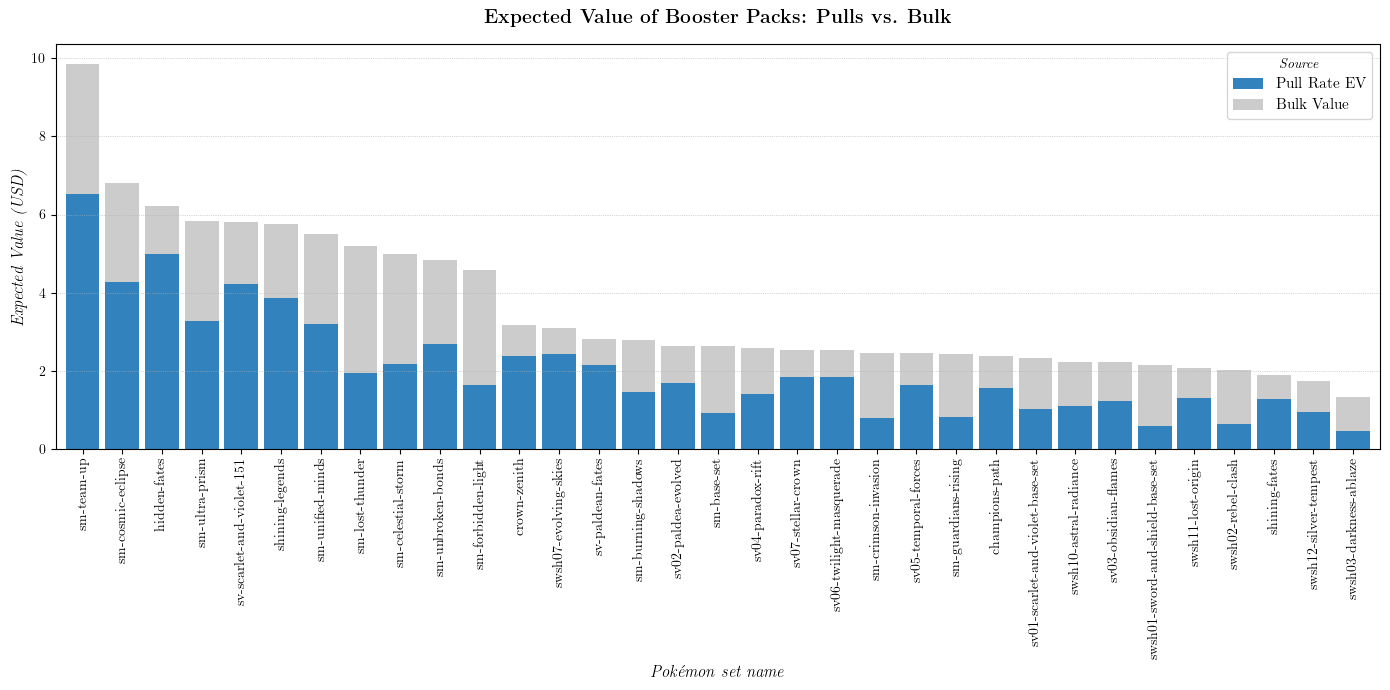

In [40]:
# Create value DataFrame
value_df = df[['set_name_grouped', 'pull_rate_value', 'bulk_value_formula']].set_index('set_name_grouped')
value_df = value_df.loc[df.sort_values('expected_value_formula', ascending=False)['set_name_grouped']]

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

value_df.plot(kind='bar', stacked=True, color=['#3182bd', '#cccccc'], ax=ax, width=0.85)

ax.set_title(r'\textbf{Expected Value of Booster Packs: Pulls vs. Bulk}', pad=15)
ax.set_ylabel(r'\textit{Expected Value (USD)}')
ax.set_xlabel(r'\textit{Pok\'emon set name}')
ax.legend(['Pull Rate EV', 'Bulk Value'], title=r'\textit{Source}', loc='upper right')
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## now check the variability of total pull rates probability for the sets:

In [81]:
# Group by set and sum the pull probabilities
pull_prob_summary = (
    filtered_df[filtered_df['precise_pull'].notna()]
    .groupby('set_name_grouped')['precise_pull']
    .sum()
    .reset_index()
    .rename(columns={'precise_pull': 'total_pull_probability'})
)

# Subtract 1 from each set to remove code card effect
pull_prob_summary['total_pull_probability'] = pull_prob_summary['total_pull_probability'] - 1

# Optional: sort by release date if you already merged that
if 'release_date' in booster_pack_values_detailed_final2.columns:
    pull_prob_summary = pull_prob_summary.merge(
        booster_pack_values_detailed_final2[['set_name_grouped', 'release_date']],
        on='set_name_grouped',
        how='left'
    ).sort_values('release_date')


pull_prob_summary = pull_prob_summary.rename(columns={'set_name_grouped': 'set_name'})



cross_section_original_df = pd.read_excel('cross_section_final.xlsx')


merged_df = pull_prob_summary.merge(cross_section_original_df, on='set_name', how='left')
merged_df


,set_name,total_pull_probability,release_date_x,product_name,booster_price,expected_value,avg_top_5_price,release_date_y,set_age,is_special_set
0,sm-base-set,0.1765,2017-02-03,Sun & Moon Booster Pack,6.45,3.150060,34.336,2017-02-03,8.126027,0
1,sm-guardians-rising,0.1680,2017-05-05,Guardians Rising Booster Pack,10.39,3.433556,33.190,2017-05-05,7.876712,0
2,sm-burning-shadows,0.1742,2017-08-04,Burning Shadows Booster Pack,9.68,3.524877,118.276,2017-08-04,7.627397,0
3,shining-legends,0.2695,2017-10-06,Shining Legends Booster Pack,30.44,6.988347,59.372,2017-10-06,7.454795,1
4,sm-crimson-invasion,0.1497,2017-11-03,Crimson Invasion Booster Pack,6.42,3.673729,23.544,2017-11-03,7.378082,0
5,sm-ultra-prism,0.2329,2018-02-02,Ultra Prism Booster Pack,18.33,7.587501,161.272,2018-02-02,7.128767,0
6,sm-forbidden-light,0.2096,2018-05-04,Forbidden Light Booster Pack,15.49,6.922504,42.276,2018-05-04,6.879452,0
7,sm-celestial-storm,0.2169,2018-08-03,Celestial Storm Booster Pack,18.29,6.941998,100.690,2018-08-03,6.630137,0
8,sm-lost-thunder,0.2920,2018-11-02,Lost Thunder Booster Pack,14.96,8.315090,80.544,2018-11-02,6.380822,0
9,sm-team-up,0.2179,2019-02-01,Team Up Booster Pack,53.27,12.365701,344.944,2019-02-01,6.131507,0


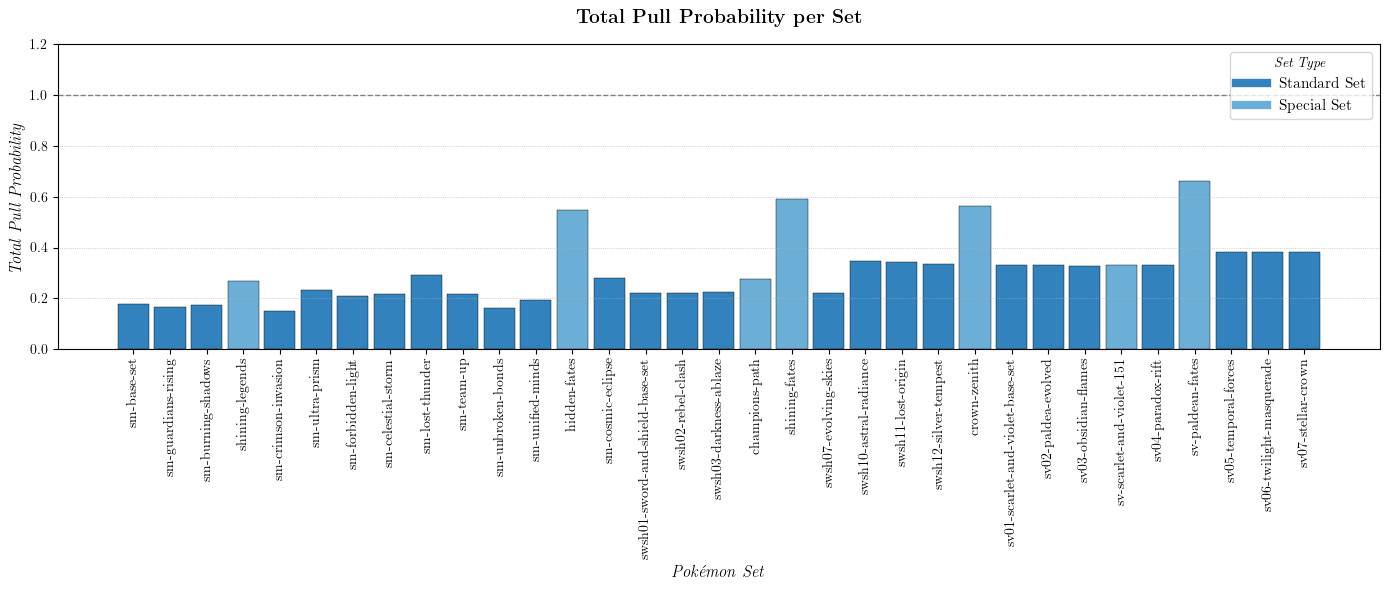

In [83]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# LaTeX-friendly style
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Make sure your DataFrame has 'is_special_set' and is sorted by release
df = merged_df.copy()
df = df.sort_values('release_date_x')

# Create colors (slightly different for special sets)
colors = df['is_special_set'].map(lambda x: '#6baed6' if x == 1 else '#3182bd')  # lighter blue for special sets

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(
    df['set_name'],
    df['total_pull_probability'],
    color=colors,
    width=0.85,
    edgecolor='black',
    linewidth=0.3
)

# Title and labels
ax.set_title(r'\textbf{Total Pull Probability per Set}', pad=15)
ax.set_ylabel(r'\textit{Total Pull Probability}')
ax.set_xlabel(r'\textit{Pok\'emon Set}')
ax.set_ylim(0, 1.2)
ax.axhline(1, color='gray', linestyle='--', linewidth=1, label=r'\textit{Max Probability = 1}')
ax.legend(handles=[
    plt.Line2D([0], [0], color='#3182bd', lw=6, label='Standard Set'),
    plt.Line2D([0], [0], color='#6baed6', lw=6, label='Special Set')
], loc='upper right', title=r'\textit{Set Type}')

# Grid and layout
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [87]:
booster_pack_values_detailed_final_FOR_FINAL_GRAPH

,set_name_grouped,is_sv_era,expected_value,pull_rate_value,bulk_value_simple,μ_bulk_weighted_check,μ_bulk_weighted_check*10,expected_value_formula,bulk_value_formula,rare_slot_value,...,n_common,n_uncommon,n_rare_non_holo,n_holo_rare,n_reverse_common,n_reverse_uncommon,n_reverse_rare,n_energy,n_rh_total,n_rare_total
0,champions-path,False,2.987305,1.568787,1.418519,0.141852,1.418519,2.396511,0.827724,0.153000,...,21,23,0,10,21,23,10,0,54,10
1,crown-zenith,False,4.064795,2.377514,1.687281,0.168728,1.687281,3.178266,0.800752,0.240222,...,42,29,22,23,42,29,41,0,112,45
2,hidden-fates,False,7.267429,5.004036,2.263393,0.226339,2.263393,6.208739,1.204702,0.234286,...,18,17,15,6,18,17,21,0,56,21
3,shining-fates,False,2.439886,1.271408,1.168478,0.116848,1.168478,1.909970,0.638562,0.129333,...,18,13,8,7,18,13,15,0,46,15
4,shining-legends,False,6.988347,3.877514,3.110833,0.311083,3.110833,5.766799,1.889286,0.297500,...,23,25,0,12,23,25,12,0,60,12
5,sm-base-set,False,3.150060,0.920801,2.229259,0.222926,2.229259,2.642738,1.721937,0.243333,...,44,49,17,16,44,49,33,18,126,33
6,sm-burning-shadows,False,3.524877,1.464964,2.059914,0.205991,2.059914,2.796261,1.331298,0.230789,...,39,39,25,13,39,39,38,0,116,38
7,sm-celestial-storm,False,6.941998,2.183239,4.758759,0.475876,4.758759,4.996197,2.812959,0.850286,...,40,62,17,18,40,62,35,0,137,35
8,sm-cosmic-eclipse,False,8.871870,4.272906,4.598964,0.459896,4.598964,6.806074,2.533168,0.596833,...,67,66,38,22,67,66,60,0,193,60
9,sm-crimson-invasion,False,3.673729,0.798729,2.875000,0.287500,2.875000,2.453844,1.655115,0.333125,...,34,26,20,12,34,26,32,0,92,32


In [88]:
# Ensure both DataFrames are loaded in your environment
# merged_df = pd.read_csv(...) or pd.read_excel(...)
# booster_pack_values_detailed_final_FOR_FINAL_GRAPH = pd.read_csv(...) or pd.read_excel(...)

# Merge based on set_name (merged_df) and set_name_grouped (booster_pack_values_detailed_final...)
merged_df_final = merged_df.merge(
    booster_pack_values_detailed_final_FOR_FINAL_GRAPH[[
        'set_name_grouped', 'is_sv_era', 'rare_slot_value', 'reverse_holo_value', 'expected_value_formula'
    ]],
    left_on='set_name',
    right_on='set_name_grouped',
    how='left'
)

# Optional: Drop the now-redundant merge key column
merged_df_final.drop(columns=['set_name_grouped'], inplace=True)

# Preview result
print(merged_df_final.head())


              set_name  total_pull_probability release_date_x  \
0          sm-base-set                  0.1765     2017-02-03   
1  sm-guardians-rising                  0.1680     2017-05-05   
2   sm-burning-shadows                  0.1742     2017-08-04   
3      shining-legends                  0.2695     2017-10-06   
4  sm-crimson-invasion                  0.1497     2017-11-03   

                    product_name  booster_price  expected_value  \
0        Sun & Moon Booster Pack           6.45        3.150060   
1  Guardians Rising Booster Pack          10.39        3.433556   
2   Burning Shadows Booster Pack           9.68        3.524877   
3   Shining Legends Booster Pack          30.44        6.988347   
4  Crimson Invasion Booster Pack           6.42        3.673729   

   avg_top_5_price release_date_y   set_age  is_special_set  is_sv_era  \
0           34.336     2017-02-03  8.126027               0      False   
1           33.190     2017-05-05  7.876712               

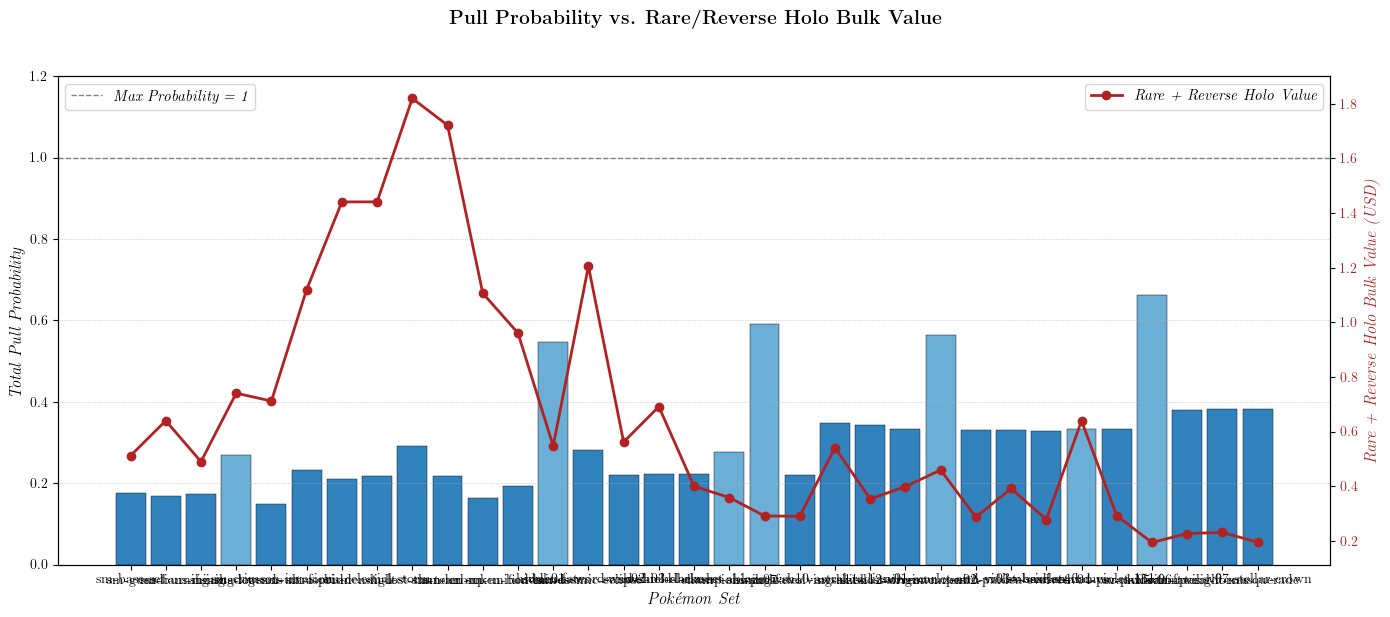

In [90]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Ensure LaTeX plotting style
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Use your merged DataFrame
df = merged_df_final.copy()

# Sort by release date
df = df.sort_values(by='release_date_x')

# Calculate combined rare + reverse holo value
df['bulk_rare_and_reverse'] = df['rare_slot_value'] + df['reverse_holo_value']

# Set x labels
x_labels = df['set_name']

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot: Pull probability
colors = df['is_special_set'].map(lambda x: '#6baed6' if x == 1 else '#3182bd')
ax1.bar(
    x_labels,
    df['total_pull_probability'],
    color=colors,
    width=0.85,
    edgecolor='black',
    linewidth=0.3
)

ax1.set_ylabel(r'\textit{Total Pull Probability}', color='black')
ax1.set_ylim(0, 1.2)
ax1.axhline(1, color='gray', linestyle='--', linewidth=1, label=r'\textit{Max Probability = 1}')
ax1.tick_params(axis='y')

# Line plot: Rare + Reverse value
ax2 = ax1.twinx()
ax2.plot(
    x_labels,
    df['bulk_rare_and_reverse'],
    color='firebrick',
    marker='o',
    linewidth=2,
    label=r'\textit{Rare + Reverse Holo Value}'
)
ax2.set_ylabel(r'\textit{Rare + Reverse Holo Bulk Value (USD)}', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

# Layout
fig.suptitle(r'\textbf{Pull Probability vs. Rare/Reverse Holo Bulk Value}', fontsize=14, y=1.02)
ax1.set_xlabel(r'\textit{Pok\'emon Set}')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(axis='y', linestyle=':', linewidth=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### final analysis  
(including the correct set_age, and selected figures and models)

In [13]:
!pip install statsmodels

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\janhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
cross_section_final = pd.read_excel('cross_section_final.xlsx')


### Correct the set_age:

#### use the reference_date when the data was scraped (both cards and booster prices):

(! using 365.25 to account for leap years!)

In [16]:
import pandas as pd
from datetime import datetime


# Convert 'release_date' to datetime format
cross_section_final["release_date"] = pd.to_datetime(cross_section_final["release_date"], errors="coerce")


# Set the dataset creation date (October 7, 2024)
reference_date = pd.to_datetime("07.10.2024", dayfirst=True)
print(reference_date)

# Calculate age of the set in years
cross_section_final["set_age"] = (reference_date - cross_section_final["release_date"]).dt.days / 365.25  # Convert days to years

cross_section_final

2024-10-07 00:00:00


,product_name,booster_price,set_name,expected_value,avg_top_5_price,release_date,set_age,is_special_set
0,Champion's Path Booster Pack,8.56,champions-path,2.987305,65.884,2020-09-25,4.032854,1
1,Crown Zenith Booster Pack,3.98,crown-zenith,4.064795,59.564,2023-01-20,1.713895,1
2,Hidden Fates Booster Pack,19.96,hidden-fates,7.267429,161.866,2019-08-23,5.125257,1
3,Shining Fates Booster Pack,4.88,shining-fates,2.439886,21.472,2021-02-19,3.630390,1
4,Shining Legends Booster Pack,30.44,shining-legends,6.988347,59.372,2017-10-06,7.003422,1
5,Sun & Moon Booster Pack,6.45,sm-base-set,3.150060,34.336,2017-02-03,7.674196,0
6,Burning Shadows Booster Pack,9.68,sm-burning-shadows,3.524877,118.276,2017-08-04,7.175907,0
7,Celestial Storm Booster Pack,18.29,sm-celestial-storm,6.941998,100.690,2018-08-03,6.179329,0
8,Cosmic Eclipse Booster Pack,19.53,sm-cosmic-eclipse,8.871870,148.622,2019-11-01,4.933607,0
9,Crimson Invasion Booster Pack,6.42,sm-crimson-invasion,3.673729,23.544,2017-11-03,6.926762,0


In [83]:
cross_section_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product_name     33 non-null     object        
 1   booster_price    33 non-null     float64       
 2   set_name         33 non-null     object        
 3   expected_value   33 non-null     float64       
 4   avg_top_5_price  33 non-null     float64       
 5   release_date     33 non-null     datetime64[ns]
 6   set_age          33 non-null     float64       
 7   is_special_set   33 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.2+ KB


### Summary stats: 

In [18]:
summary_stats = cross_section_final[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]].describe()
print(summary_stats)


       booster_price  expected_value  avg_top_5_price    set_age  \
count      33.000000       33.000000        33.000000  33.000000   
mean       10.603636        4.589401        86.482545   3.864435   
std        10.449620        2.525528        87.591944   2.441881   
min         2.800000        2.088103        10.484000   0.065708   
25%         3.610000        2.771828        33.190000   1.522245   
50%         6.420000        3.418704        58.466000   4.147844   
75%        15.490000        6.941998       104.150000   5.930185   
max        53.270000       12.365701       411.256000   7.674196   

       is_special_set  
count       33.000000  
mean         0.212121  
std          0.415149  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  


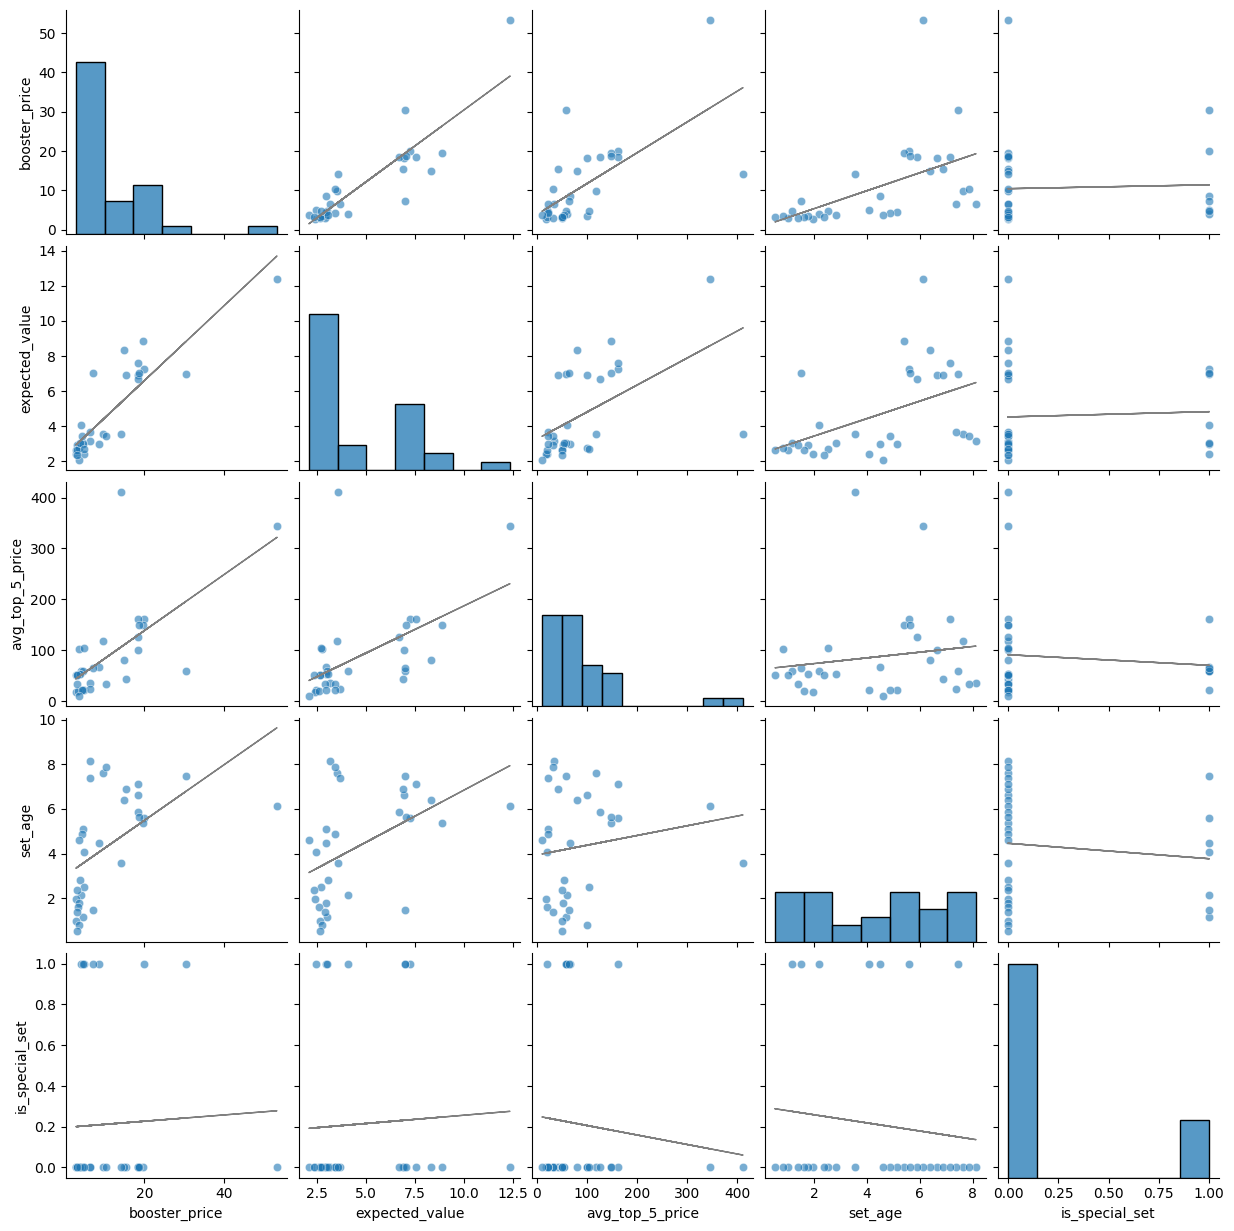

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll  # Correct import for PathCollection

# Create the pairplot (without trendlines initially)
g = sns.pairplot(
    cross_section_final[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]],
    plot_kws={'alpha': 0.6}  # Keeps the original look
)

# Add trendlines manually with a more subtle appearance
for ax in g.axes.flat:
    if ax is not None:
        # Extract scatter plot points
        scatter_points = [p for p in ax.collections if isinstance(p, mcoll.PathCollection)]
        if scatter_points:
            x_values, y_values = scatter_points[0].get_offsets().T  # Get X and Y data points

            if len(x_values) > 1:  # Ensure enough points for a trendline
                # Fit a simple linear regression (trendline)
                m, b = np.polyfit(x_values, y_values, 1)
                ax.plot(x_values, m * x_values + b, color='gray', linestyle='-', linewidth=1)  # Thin, solid gray line

# Show the modified pairplot
plt.show()



In [6]:
# Define independent variables
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for VIF calculation

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif_data)


          Variable       VIF
0            const  5.905493
1   expected_value  1.884129
2  avg_top_5_price  1.471519
3          set_age  1.373546
4   is_special_set  1.061218


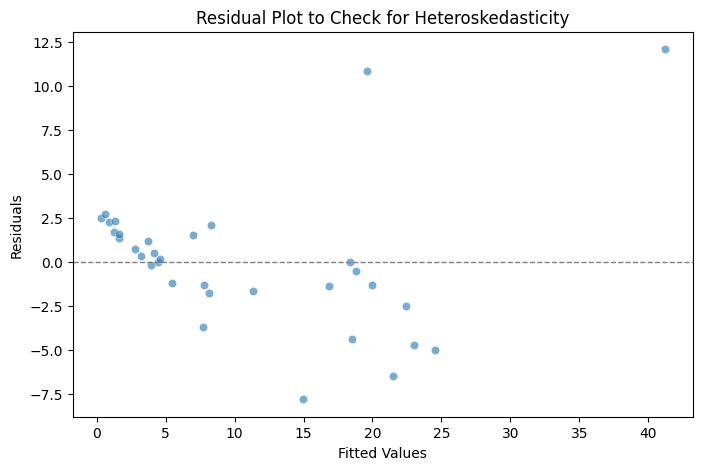

,Test,LM Statistic,p-value
0,Breusch-Pagan,16.857056,0.002061
0,White,31.748570,0.002617


In [7]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression model

# Fit OLS model
model = sm.OLS(y, X).fit()

# 1. Residual Plot (Visual Check)
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot to Check for Heteroskedasticity")
plt.show()

# 2. Breusch-Pagan Test
bp_test = sms.het_breuschpagan(residuals, X)
bp_test_results = pd.DataFrame({
    "Test": ["Breusch-Pagan"],
    "LM Statistic": [bp_test[0]],
    "p-value": [bp_test[1]]
})

# 3. White's Test
white_test = sms.het_white(residuals, X)
white_test_results = pd.DataFrame({
    "Test": ["White"],
    "LM Statistic": [white_test[0]],
    "p-value": [white_test[1]]
})

# Combine results
heteroskedasticity_results = pd.concat([bp_test_results, white_test_results])

heteroskedasticity_results

## -> so there is heteroskedasticity

In [8]:
# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for the regression model

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     41.35
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.30e-11
Time:                        16:21:01   Log-Likelihood:                -91.865
No. Observations:                  33   AIC:                             193.7
Df Residuals:                      28   BIC:                             201.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2452      1.798     

In [9]:
# Run OLS regression with robust standard errors
robust_model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 is more conservative but reliable

# Print the robust regression results
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     8.974
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           8.54e-05
Time:                        16:21:01   Log-Likelihood:                -91.865
No. Observations:                  33   AIC:                             193.7
Df Residuals:                      28   BIC:                             201.2
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2452      2.859     

In [10]:
robust_model = sm.OLS(y, X).fit(cov_type='HC0')
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     18.39
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.63e-07
Time:                        16:21:01   Log-Likelihood:                -91.865
No. Observations:                  33   AIC:                             193.7
Df Residuals:                      28   BIC:                             201.2
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.2452      1.851     

## very bad:

In [11]:
import statsmodels.api as sm
import numpy as np

# Define dependent and independent variables
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant

# Step 1: Run initial OLS model to get residuals
initial_model = sm.OLS(y, X).fit()
residuals = initial_model.resid

# Step 2: Estimate variance of residuals
weights = 1 / (residuals**2)  # Inverse variance as weights (avoiding division by zero)

# Step 3: Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Print WLS regression summary
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.231e+05
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           5.51e-59
Time:                        16:21:02   Log-Likelihood:                -52.264
No. Observations:                  33   AIC:                             114.5
Df Residuals:                      28   BIC:                             122.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0236      0.213    -

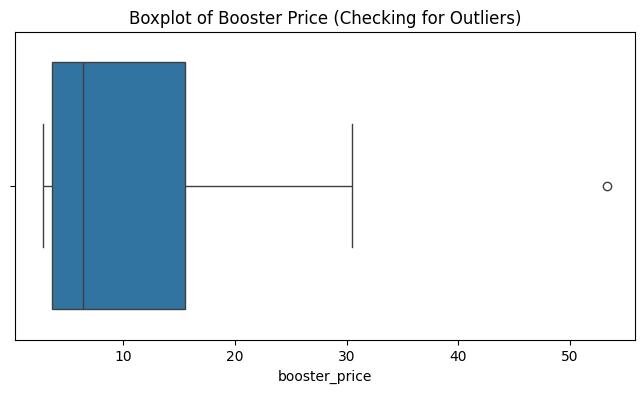

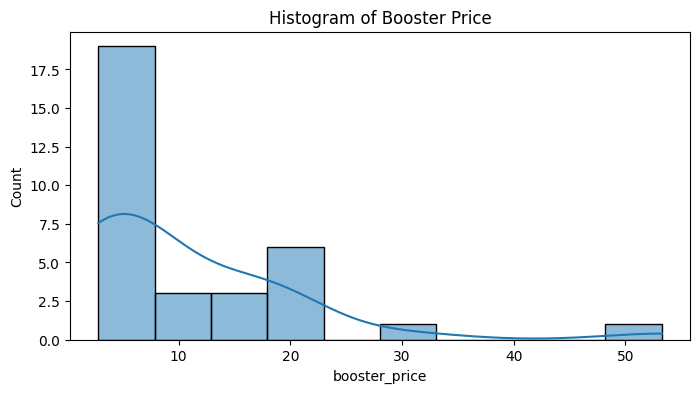


### Z-Score Outliers (booster_price) ###
    booster_price
13          53.27

### IQR Outliers (booster_price) ###
    booster_price
13          53.27

### Cook’s Distance Outliers (booster_price) ###
    booster_price
4           30.44
13          53.27
18           7.17
29          14.16


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1️Boxplot to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=cross_section_final["booster_price"])
plt.title("Boxplot of Booster Price (Checking for Outliers)")
plt.show()

# 2️Histogram to check distribution
plt.figure(figsize=(8, 4))
sns.histplot(cross_section_final["booster_price"], bins=10, kde=True)
plt.title("Histogram of Booster Price")
plt.show()

# 3️Z-Score Method (Values > 3 or < -3 are Outliers)
cross_section_final["z_score"] = (cross_section_final["booster_price"] - cross_section_final["booster_price"].mean()) / cross_section_final["booster_price"].std()
z_outliers = cross_section_final[abs(cross_section_final["z_score"]) > 3]

# 4 IQR Method (Values outside 1.5 * IQR are Outliers)
Q1 = cross_section_final["booster_price"].quantile(0.25)
Q3 = cross_section_final["booster_price"].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = cross_section_final[
    (cross_section_final["booster_price"] < (Q1 - 1.5 * IQR)) | 
    (cross_section_final["booster_price"] > (Q3 + 1.5 * IQR))
]

# 5️ Cook’s Distance (Regression Influence)
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Identify influential points (Cook’s Distance > 4/n)
cooks_threshold = 4 / len(cross_section_final)
cooks_outliers = cross_section_final[cooks_d > cooks_threshold]

# Print Outlier Results
print("\n### Z-Score Outliers (booster_price) ###")
print(z_outliers[["booster_price"]])

print("\n### IQR Outliers (booster_price) ###")
print(iqr_outliers[["booster_price"]])

print("\n### Cook’s Distance Outliers (booster_price) ###")
print(cooks_outliers[["booster_price"]])


In [13]:
# Remove identified outlier
cross_section_final_wo_outlier = cross_section_final[cross_section_final["booster_price"] != 53.27]

# Define dependent and independent variables again
y = cross_section_final_wo_outlier["booster_price"]
X = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression


In [14]:
# Summary statistics after outlier removal
summary_stats_filtered = cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]].describe()
print("\n### Summary Statistics After Outlier Removal ###")
print(summary_stats_filtered)



### Summary Statistics After Outlier Removal ###
       booster_price  expected_value  avg_top_5_price    set_age  \
count      32.000000       32.000000        32.000000  32.000000   
mean        9.270313        4.346391        78.405625   4.256849   
std         7.222097        2.138320        75.482376   2.460414   
min         2.800000        2.088103        10.484000   0.512329   
25%         3.592500        2.759592        32.996000   1.921918   
50%         5.650000        3.284382        56.111000   4.539726   
75%        15.092500        6.927377       101.919500   6.443151   
max        30.440000        8.871870       411.256000   8.126027   

       is_special_set  
count       32.000000  
mean         0.218750  
std          0.420013  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  


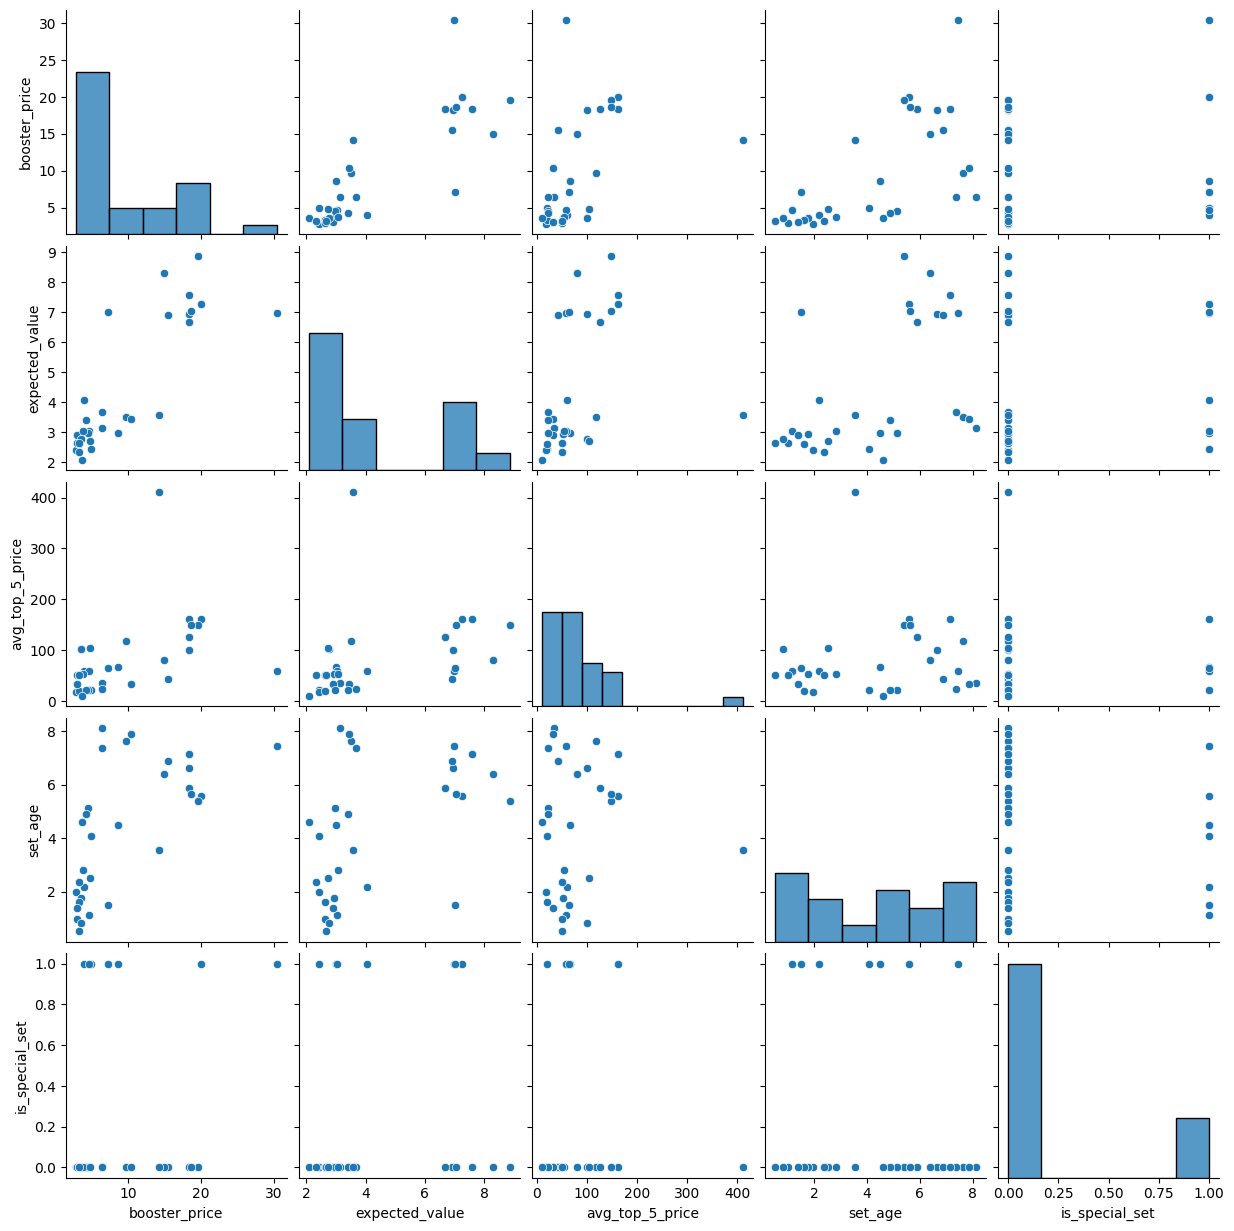

In [15]:
# Pairplot to check new relationships after outlier removal
sns.pairplot(cross_section_final_wo_outlier[["booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
X_vif = sm.add_constant(cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Variable"] = X_vif.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print new VIF values
print("\n### Variance Inflation Factor (VIF) After Outlier Removal ###")
print(vif_data_filtered)



### Variance Inflation Factor (VIF) After Outlier Removal ###
          Variable       VIF
0            const  6.445290
1   expected_value  1.575767
2  avg_top_5_price  1.158846
3          set_age  1.388248
4   is_special_set  1.070701


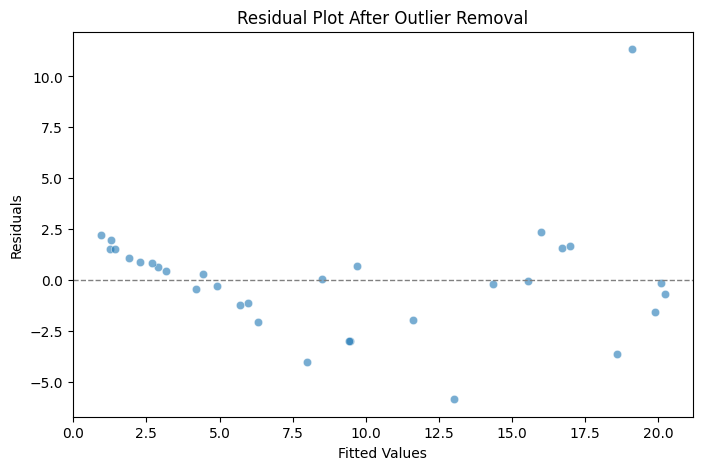


### Breusch-Pagan Test (After Outlier Removal) ###
LM Statistic: 8.876310208300527, p-value: 0.06426659914849715

### White's Test (After Outlier Removal) ###
LM Statistic: 29.526346989763585, p-value: 0.005508009519154652


In [17]:
import statsmodels.stats.api as sms

# Fit OLS model again
filtered_model = sm.OLS(y, X).fit()
residuals_filtered = filtered_model.resid
fitted_values_filtered = filtered_model.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered, y=residuals_filtered, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot After Outlier Removal")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered = sms.het_breuschpagan(residuals_filtered, X)
print("\n### Breusch-Pagan Test (After Outlier Removal) ###")
print(f"LM Statistic: {bp_test_filtered[0]}, p-value: {bp_test_filtered[1]}")

# White's Test
white_test_filtered = sms.het_white(residuals_filtered, X)
print("\n### White's Test (After Outlier Removal) ###")
print(f"LM Statistic: {white_test_filtered[0]}, p-value: {white_test_filtered[1]}")


In [18]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())



### Final Regression Results After Outlier Removal (HC3 Robust) ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     78.02
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.96e-14
Time:                        16:21:04   Log-Likelihood:                -78.461
No. Observations:                  32   AIC:                             166.9
Df Residuals:                      27   BIC:                             174.3
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [19]:
# OLS Regression with HC3 Robust Standard Errors
final_robust_model = sm.OLS(y, X).fit(cov_type='HC0')

# Print the updated regression summary
print("\n### Final Regression Results After Outlier Removal (HC3 Robust) ###")
print(final_robust_model.summary())



### Final Regression Results After Outlier Removal (HC3 Robust) ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     125.8
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.84e-17
Time:                        16:21:04   Log-Likelihood:                -78.461
No. Observations:                  32   AIC:                             166.9
Df Residuals:                      27   BIC:                             174.3
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [20]:
# Run OLS regression
model_wo_hc = sm.OLS(y, X).fit()

# Print the regression results
print(model_wo_hc.summary())

                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     36.46
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.61e-10
Time:                        16:21:04   Log-Likelihood:                -78.461
No. Observations:                  32   AIC:                             166.9
Df Residuals:                      27   BIC:                             174.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.8601      1.373     

In [21]:
# Remove is_special_set and re-run the regression
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Run the final model
final_model_no_special = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# Print results
print("\n### Final Regression Without is_special_set ###")
print(final_model_no_special.summary())



### Final Regression Without is_special_set ###
                            OLS Regression Results                            
Dep. Variable:          booster_price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     115.9
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.79e-16
Time:                        16:21:04   Log-Likelihood:                -80.251
No. Observations:                  32   AIC:                             168.5
Df Residuals:                      28   BIC:                             174.4
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

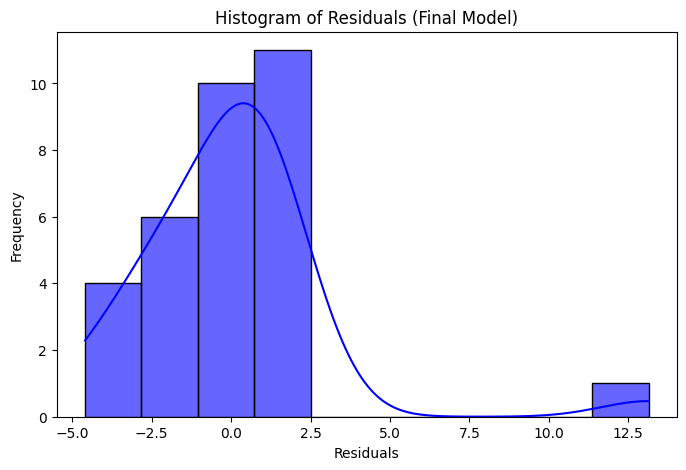

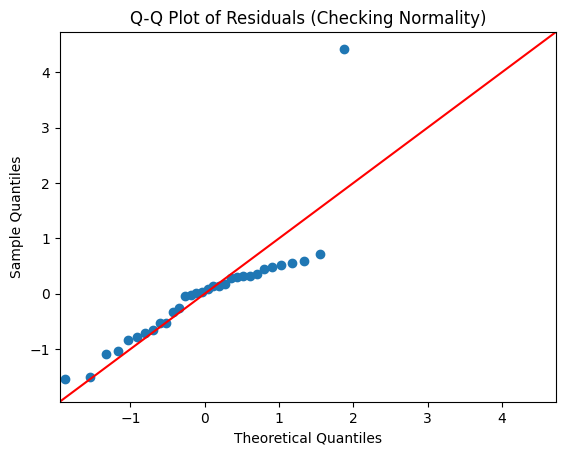


### Shapiro-Wilk Test for Normality ###
Statistic: 0.7530485423681719, p-value: 5.997543928172345e-06

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.2163623451615284, p-value: 0.08548798858582318

### Jarque-Bera Test for Normality ###
Statistic: 149.7819155104036, p-value: 2.9872412827810234e-33


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Load your cleaned dataset (filtered_df) before running this code
# Define dependent and independent variables
y = cross_section_final_wo_outlier["booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the final regression model
final_model = sm.OLS(y, X_filtered).fit(cov_type='HC3')

# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model.resid, 'norm', args=(final_model.resid.mean(), final_model.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


In [23]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())



### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.88e-17
Time:                        16:21:04   Log-Likelihood:                 6.0718
No. Observations:                  32   AIC:                            -4.144
Df Residuals:                      28   BIC:                             1.719
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\janhr\AppData\Local\Temp\ipykernel_6880\2655366185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


In [24]:
# Apply log transformation to dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final_wo_outlier["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price ###")
print(final_model_log.summary())



### Regression with Log-Transformed Booster Price ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     119.4
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           9.34e-17
Time:                        16:21:04   Log-Likelihood:                 11.346
No. Observations:                  32   AIC:                            -12.69
Df Residuals:                      27   BIC:                            -5.363
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\janhr\AppData\Local\Temp\ipykernel_6880\1541417680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


In [25]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())



### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:          booster_price   Pseudo R-squared:               0.6871
Model:                       QuantReg   Bandwidth:                       2.682
Method:                 Least Squares   Sparsity:                        5.677
Date:                Tue, 01 Apr 2025   No. Observations:                   32
Time:                        16:21:04   Df Residuals:                       28
                                        Df Model:                            3
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0186      1.247     -3.221      0.003      -6.574      -1.463
expected_value      1.8146      0.291      6.231      0.000       1.218       2.411
avg_top_5_price     0.0217      0.007      3.003      0.006      

In [26]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model = smf.quantreg('booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final_wo_outlier).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model.summary())


### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:          booster_price   Pseudo R-squared:               0.7031
Model:                       QuantReg   Bandwidth:                       2.405
Method:                 Least Squares   Sparsity:                        5.080
Date:                Tue, 01 Apr 2025   No. Observations:                   32
Time:                        16:21:04   Df Residuals:                       27
                                        Df Model:                            4
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.1259      1.140     -3.620      0.001      -6.465      -1.787
expected_value      1.8505      0.268      6.910      0.000       1.301       2.400
avg_top_5_price     0.0220      0.007      3.388      0.002      

In [27]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

# Recreate the log-transformed dependent variable
cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])

# Define the new dependent variable
y_log = cross_section_final_wo_outlier["log_booster_price"]
X_filtered = cross_section_final_wo_outlier[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X_filtered = sm.add_constant(X_filtered)  # Add constant

# Fit the log-transformed model again
final_model_log = sm.OLS(y_log, X_filtered).fit(cov_type='HC3')

# Print the model summary
print("\n### Log-Transformed Model Summary ###")
print(final_model_log.summary())



### Log-Transformed Model Summary ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     119.4
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           9.34e-17
Time:                        16:21:04   Log-Likelihood:                 11.346
No. Observations:                  32   AIC:                            -12.69
Df Residuals:                      27   BIC:                            -5.363
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
con

C:\Users\janhr\AppData\Local\Temp\ipykernel_6880\3254096150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_section_final_wo_outlier["log_booster_price"] = np.log(cross_section_final_wo_outlier["booster_price"])


## the above is for the following:

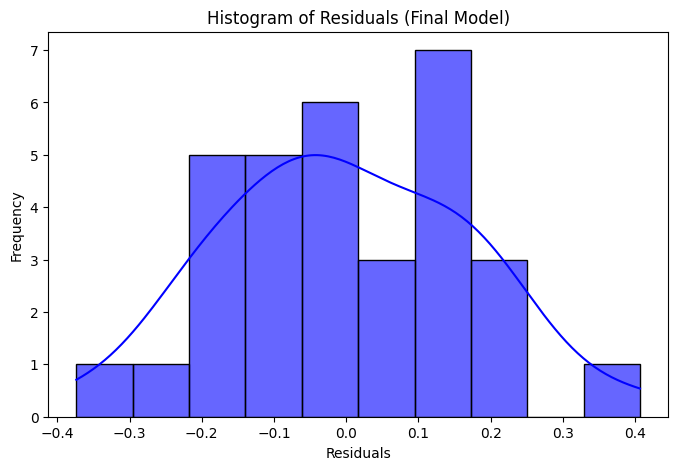

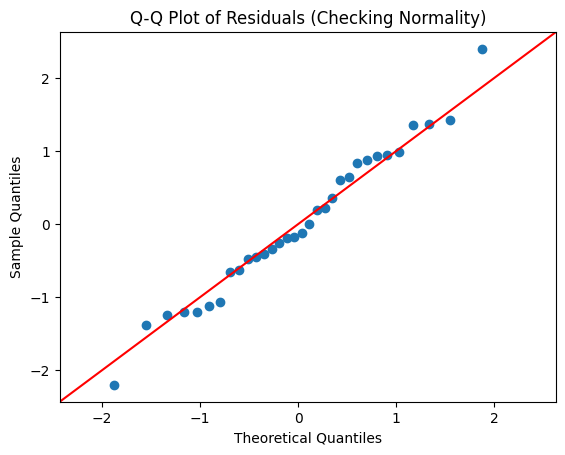


### Shapiro-Wilk Test for Normality ###
Statistic: 0.9834211704454925, p-value: 0.890594866240537

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.08053797143487906, p-value: 0.9748462834351292

### Jarque-Bera Test for Normality ###
Statistic: 0.23552788403442743, p-value: 0.8889058611746261


In [28]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log.resid, 'norm', args=(final_model_log.resid.mean(), final_model_log.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


## the errors are normal now..

In [29]:
# Set seed for reproducibility
np.random.seed(42)

import numpy as np
import statsmodels.api as sm

cross_section_final_wo_outlier2 = cross_section_final_wo_outlier.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X_filtered.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_wo_outlier2.sample(n=len(cross_section_final_wo_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Create a DataFrame with the bootstrap results
bootstrap_results = pd.DataFrame({
    "Variable": X_filtered.columns,
    "Original Coefficient": final_model_log.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": np.std(bootstrap_coefs, axis=0),
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds
})

bootstrap_results

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper
0,const,0.298562,0.298054,0.067208,0.155935,0.419340
1,expected_value,0.172684,0.171991,0.022136,0.126027,0.216029
2,avg_top_5_price,0.003068,0.003270,0.000680,0.002255,0.005206
3,set_age,0.141646,0.139814,0.017748,0.107241,0.176420
4,is_special_set,0.265472,0.257639,0.112586,0.031793,0.464264


In [30]:
# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Add p-values to the bootstrap results table
bootstrap_results["Bootstrapped p-value"] = p_values

bootstrap_results

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,0.298562,0.298054,0.067208,0.155935,0.419340,0.000
1,expected_value,0.172684,0.171991,0.022136,0.126027,0.216029,0.000
2,avg_top_5_price,0.003068,0.003270,0.000680,0.002255,0.005206,0.000
3,set_age,0.141646,0.139814,0.017748,0.107241,0.176420,0.000
4,is_special_set,0.265472,0.257639,0.112586,0.031793,0.464264,0.032


## With the outlier:

In [45]:

# Define dependent and independent variables again
y = cross_section_final["booster_price"]
X = cross_section_final[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)  # Add constant for regression



#  Apply log transformation to dependent variable
cross_section_final["log_booster_price"] = np.log(cross_section_final["booster_price"])

# Define new dependent variable (log-transformed)
y_log = cross_section_final["log_booster_price"]

# Fit OLS again with log-transformed y
final_model_log2 = sm.OLS(y_log, X).fit(cov_type='HC3')

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log2.summary())



### Regression with Log-Transformed Booster Price (With Outlier) ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     85.31
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.90e-15
Time:                        17:29:48   Log-Likelihood:                 10.742
No. Observations:                  33   AIC:                            -11.48
Df Residuals:                      28   BIC:                            -4.002
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [46]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier.sample(n=len(cross_section_final_with_outlier), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = np.log(bootstrap_sample["booster_price"])
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results2 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results2

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,0.342418,0.337294,0.068231,0.196706,0.456049,0.000
1,expected_value,0.159977,0.165080,0.020754,0.130996,0.210215,0.000
2,avg_top_5_price,0.002848,0.002859,0.000616,0.001472,0.004195,0.004
3,set_age,0.145875,0.142510,0.016509,0.113089,0.176406,0.000
4,is_special_set,0.282451,0.270301,0.108245,0.028453,0.473451,0.030


## -> its 95% confidence interval!

### now individual R2 - loop through the variables and see the drop of R2 (i.e., just one variable dropped at a time and drop of R2 caused by this is the contribution of this variable to the overall R2):

In [47]:
# Full model R²
r2_full = final_model_log2.rsquared

# Store partial R² values
partial_r2s = {}

for var in ["expected_value", "avg_top_5_price", "set_age", "is_special_set"]:
    X_reduced = X.drop(columns=[var])
    model_reduced = sm.OLS(y_log, X_reduced).fit()
    r2_reduced = model_reduced.rsquared

    # Partial R² formula
    partial_r2 = r2_full - r2_reduced
    partial_r2s[var] = partial_r2

# Print partial R² for each predictor
print("\n### Partial R² for Each Predictor ###")
for var, r2 in partial_r2s.items():
    print(f"{var}: {r2:.4f}")



### Partial R² for Each Predictor ###
expected_value: 0.1310
avg_top_5_price: 0.0640
set_age: 0.1399
is_special_set: 0.0196


### Check for non-linear relationships:

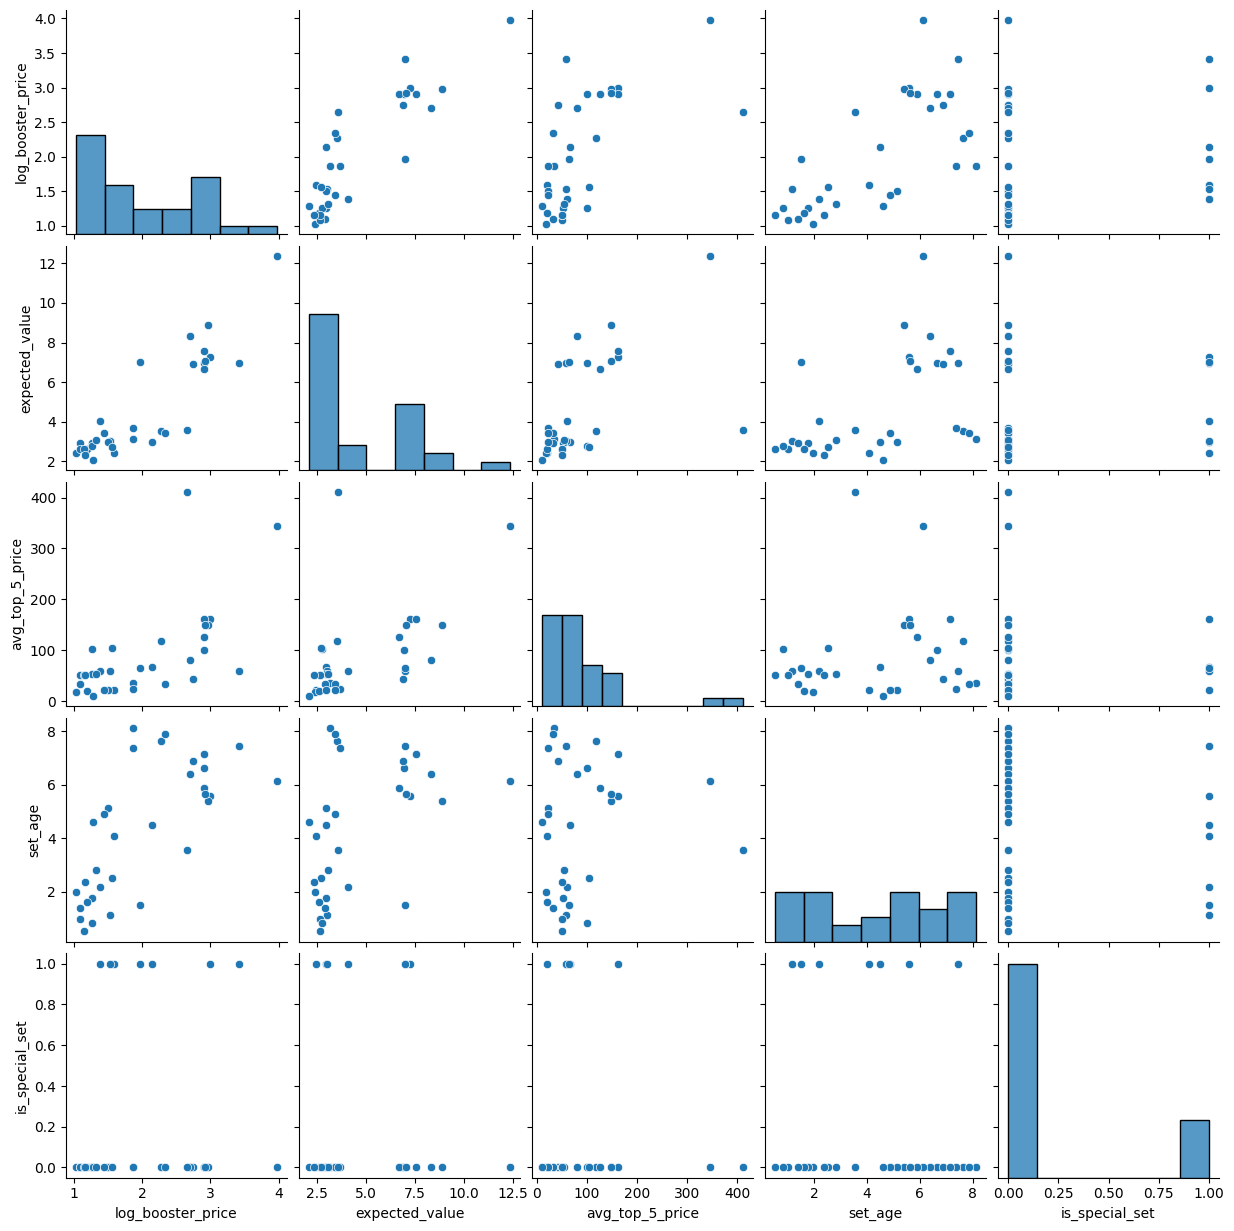

In [49]:
# Pairplot to check new relationships after taking the log of the booster_price:
sns.pairplot(cross_section_final[["log_booster_price", "expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
plt.show()


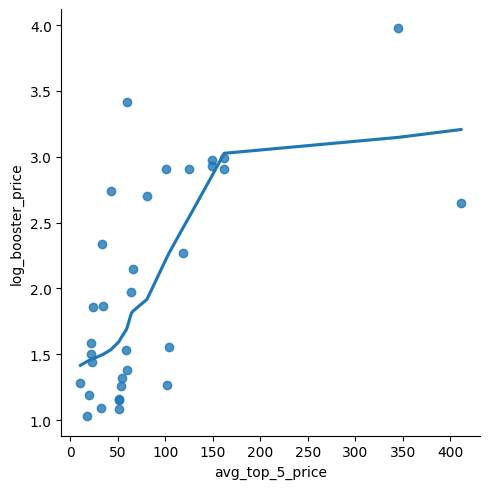

In [50]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="avg_top_5_price", y="log_booster_price", lowess=True)


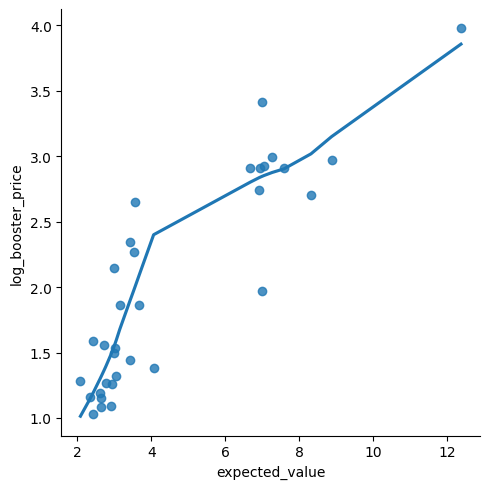

In [51]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="expected_value", y="log_booster_price", lowess=True)


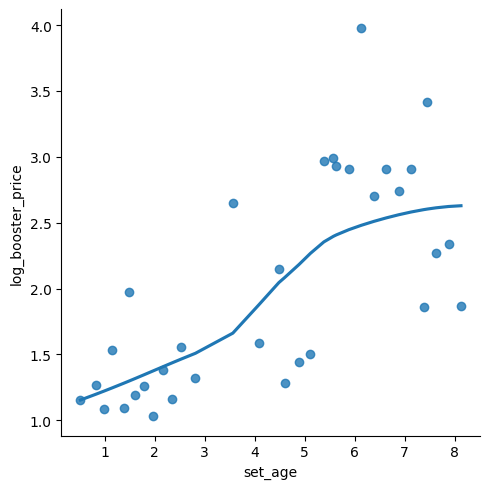

In [52]:
import seaborn as sns

sns.lmplot(data=cross_section_final, x="set_age", y="log_booster_price", lowess=True)


In [ ]:
cross_section_final['log_avg_top_5_price'] = np.log(cross_section_final['avg_top_5_price'])

model_log_log = smf.ols('log_booster_price ~ expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final ).fit()

print(model_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     128.6
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.37e-17
Time:                        18:56:13   Log-Likelihood:                 9.4073
No. Observations:                  33   AIC:                            -8.815
Df Residuals:                      28   BIC:                            -1.332
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.6101    

## model log log log:

In [57]:
# Add log of expected_value
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Refit with both logs
model_loglog = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit()

# Show summary
print(model_loglog.summary())


                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.75e-16
Time:                        19:03:18   Log-Likelihood:                 5.8554
No. Observations:                  33   AIC:                            -1.711
Df Residuals:                      28   BIC:                             5.772
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.9557    

### model log log log log:

In [58]:
# Apply log-transform to all relevant vars
cross_section_final['log_set_age'] = np.log(cross_section_final['set_age'])
cross_section_final['log_expected_value'] = np.log(cross_section_final['expected_value'])

# Fit the full log-log model
final_loglog_model = smf.ols('log_booster_price ~ log_expected_value + log_avg_top_5_price + log_set_age + is_special_set', data=cross_section_final).fit()

print(final_loglog_model.summary())


                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     86.61
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.39e-15
Time:                        19:10:22   Log-Likelihood:                 3.2980
No. Observations:                  33   AIC:                             3.404
Df Residuals:                      28   BIC:                             10.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.8753    

### wo heteroskedasticity robust errors hc3:

In [33]:
# Fit OLS again with log-transformed y
final_model_log3 = sm.OLS(y_log, X).fit()

# Print new regression results
print("\n### Regression with Log-Transformed Booster Price (With Outlier) ###")
print(final_model_log3.summary())



### Regression with Log-Transformed Booster Price (With Outlier) ###
                            OLS Regression Results                            
Dep. Variable:      log_booster_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     140.0
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           4.43e-18
Time:                        16:21:07   Log-Likelihood:                 10.742
No. Observations:                  33   AIC:                            -11.48
Df Residuals:                      28   BIC:                            -4.002
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

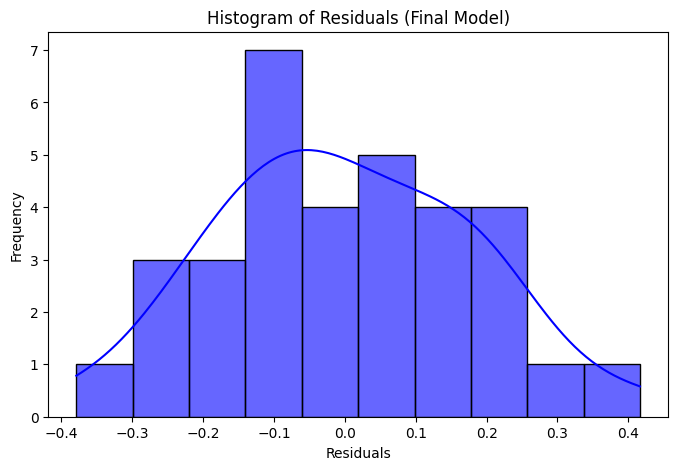

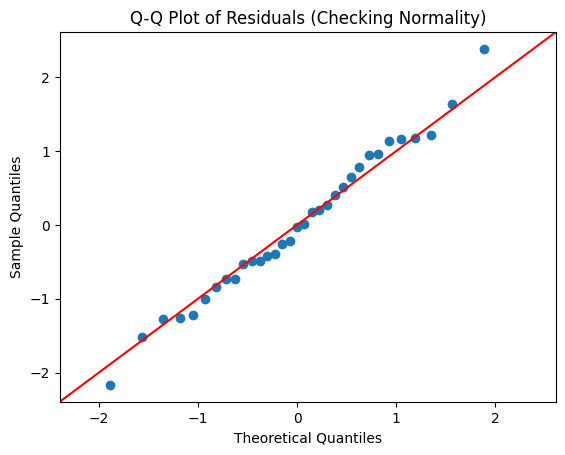


### Shapiro-Wilk Test for Normality ###
Statistic: 0.989042704715467, p-value: 0.9795830384704723

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.07359964228580534, p-value: 0.9881843797819289

### Jarque-Bera Test for Normality ###
Statistic: 0.3011891980753785, p-value: 0.8601963524111909


In [34]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log2.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log2.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log2.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log2.resid, 'norm', args=(final_model_log2.resid.mean(), final_model_log2.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log2.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


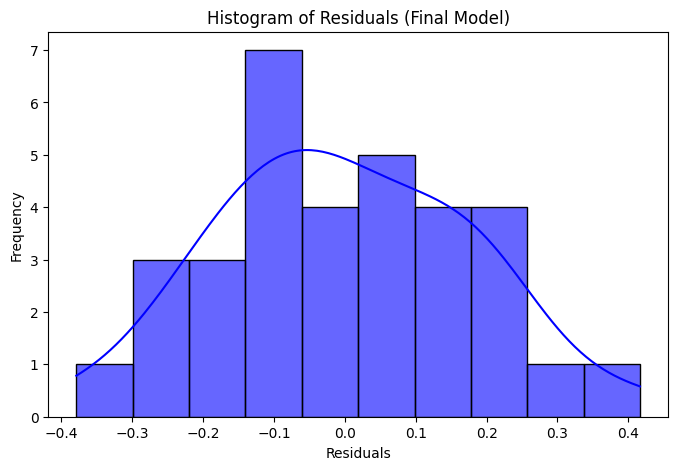

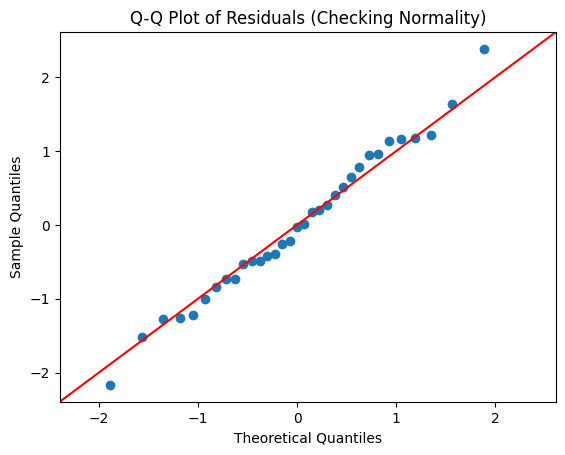


### Shapiro-Wilk Test for Normality ###
Statistic: 0.989042704715467, p-value: 0.9795830384704723

### Kolmogorov-Smirnov Test for Normality ###
Statistic: 0.07359964228580534, p-value: 0.9881843797819289

### Jarque-Bera Test for Normality ###
Statistic: 0.3011891980753785, p-value: 0.8601963524111909


In [35]:
# 1️⃣ Histogram & KDE Plot of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(final_model_log3.resid, bins=10, kde=True, color="blue", alpha=0.6)
plt.title("Histogram of Residuals (Final Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Q-Q Plot for Normality Check
sm.qqplot(final_model_log3.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Checking Normality)")
plt.show()

# 3️⃣ Shapiro-Wilk Test (Tests if residuals are normally distributed)
shapiro_test = stats.shapiro(final_model_log3.resid)
print("\n### Shapiro-Wilk Test for Normality ###")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 4️⃣ Kolmogorov-Smirnov Test (Tests normality based on CDF)
ks_test = stats.kstest(final_model_log3.resid, 'norm', args=(final_model_log3.resid.mean(), final_model_log3.resid.std()))
print("\n### Kolmogorov-Smirnov Test for Normality ###")
print(f"Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")

# 5️⃣ Jarque-Bera Test (Good for small samples, checks skewness & kurtosis)
jb_test = stats.jarque_bera(final_model_log3.resid)
print("\n### Jarque-Bera Test for Normality ###")
print(f"Statistic: {jb_test.statistic}, p-value: {jb_test.pvalue}")


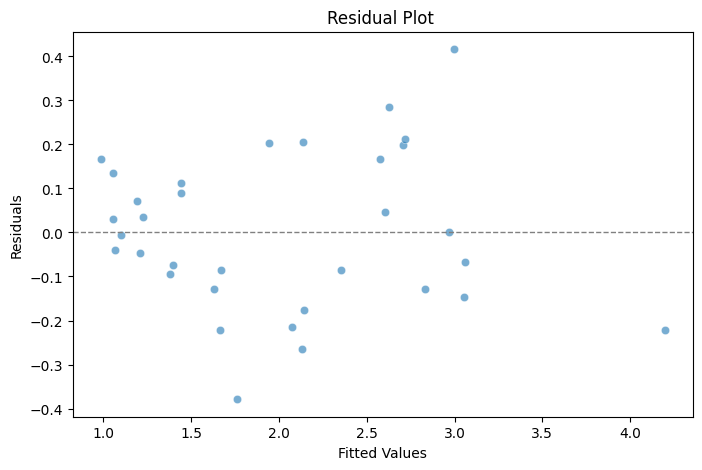


### Breusch-Pagan Test #
LM Statistic: 10.34928558424173, p-value: 0.03493759675454235

### White's Test #
LM Statistic: 21.432939006221538, p-value: 0.06479523362857839


In [36]:
residuals_filtered2 = final_model_log3.resid
fitted_values_filtered2 = final_model_log3.fittedvalues

# Residual plot after removing the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values_filtered2, y=residuals_filtered2, alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot ")
plt.show()

# Breusch-Pagan Test (Heteroskedasticity)
bp_test_filtered2 = sms.het_breuschpagan(residuals_filtered2, X)
print("\n### Breusch-Pagan Test #")
print(f"LM Statistic: {bp_test_filtered2[0]}, p-value: {bp_test_filtered2[1]}")

# White's Test
white_test_filtered2 = sms.het_white(residuals_filtered2, X)
print("\n### White's Test #")
print(f"LM Statistic: {white_test_filtered2[0]}, p-value: {white_test_filtered2[1]}")


# ...SO... we use hc3 

## Now, the quantile regression with log booster prices and with outlier:

In [37]:
import statsmodels.formula.api as smf

# Fit Quantile Regression at the median (50th percentile)
quantile_model2 = smf.quantreg('log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set', data=cross_section_final).fit(q=0.5)

# Print results
print("\n### Quantile Regression (Median) Results ###")
print(quantile_model2.summary())


### Quantile Regression (Median) Results ###
                         QuantReg Regression Results                          
Dep. Variable:      log_booster_price   Pseudo R-squared:               0.8085
Model:                       QuantReg   Bandwidth:                      0.2002
Method:                 Least Squares   Sparsity:                       0.4262
Date:                Tue, 01 Apr 2025   No. Observations:                   33
Time:                        16:21:07   Df Residuals:                       28
                                        Df Model:                            4
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3738      0.090      4.146      0.000       0.189       0.558
expected_value      0.1659      0.020      8.104      0.000       0.124       0.208
avg_top_5_price     0.0031      0.001      5.935      0.000      

## now plot across quantiles:

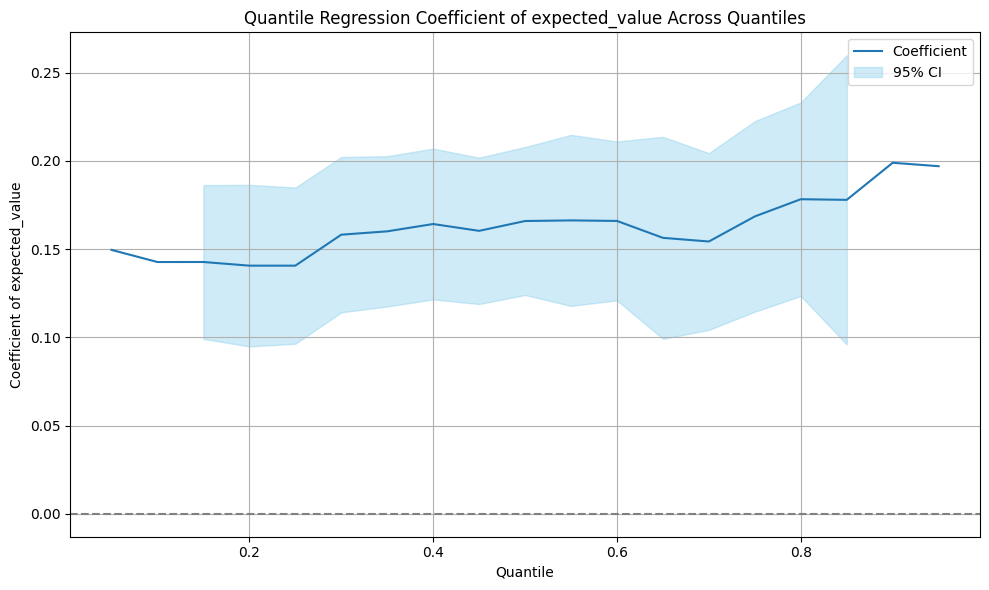

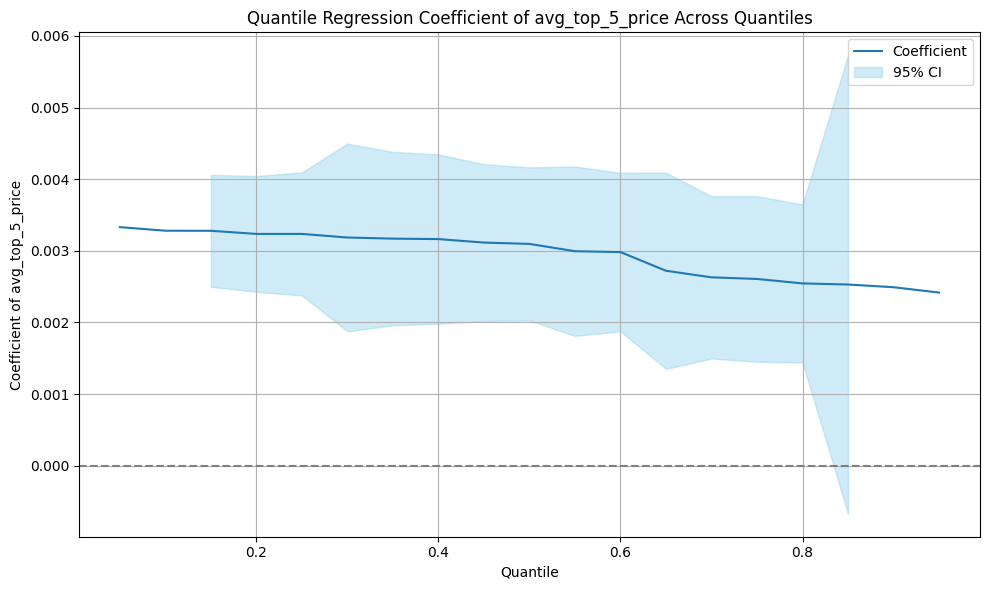

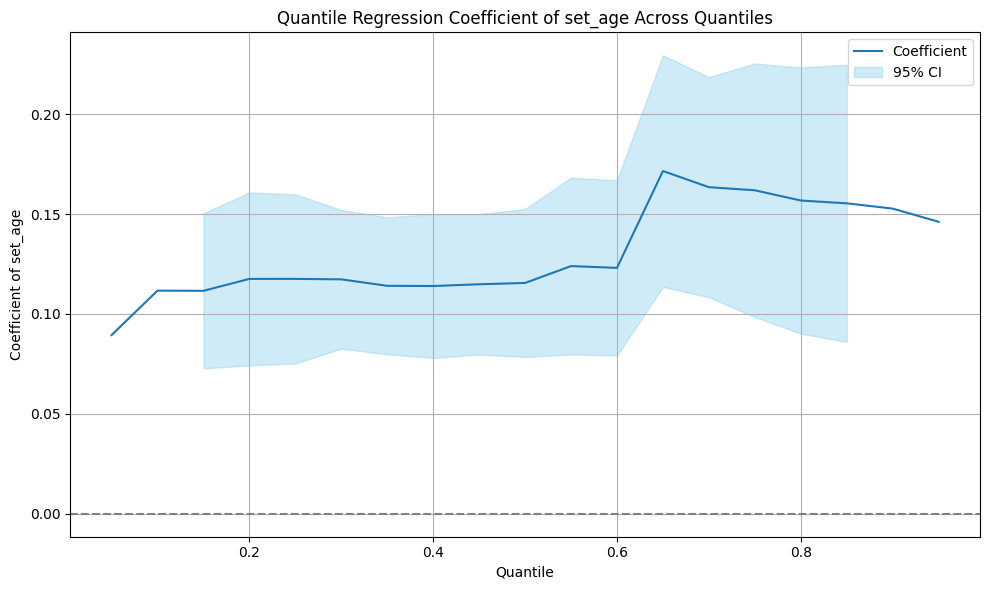

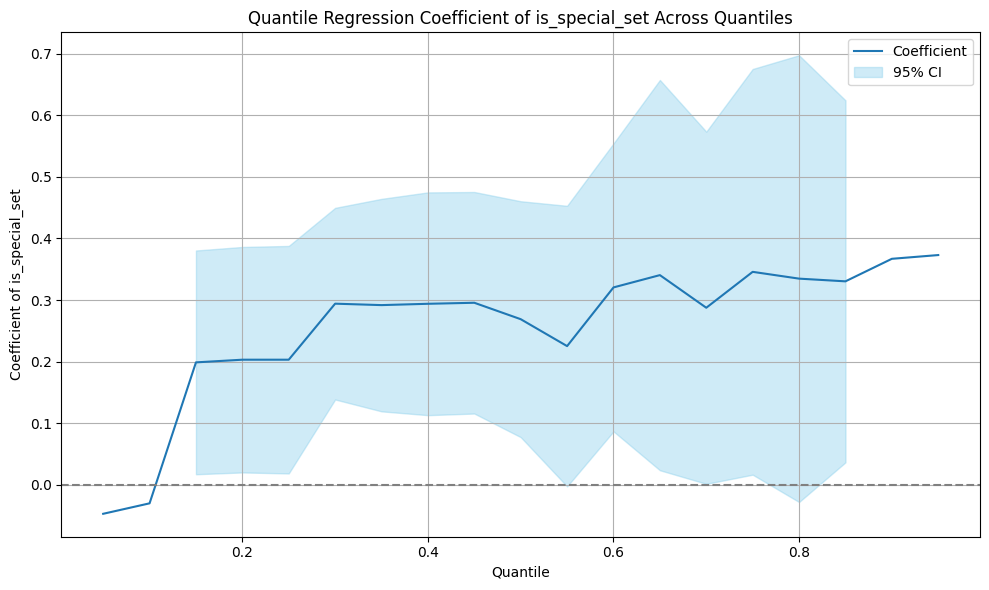

In [41]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define the model formula and variables of interest
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']

# Define quantiles
quantiles = np.arange(0.05, 0.96, 0.05)

# Loop through each variable and plot its coefficients across quantiles
for var in variables:
    coefs = []
    ci_lower = []
    ci_upper = []
    
    for q in quantiles:
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coefs.append(res.params[var])
        
        # Confidence intervals
        conf_int = res.conf_int()
        ci_lower.append(conf_int.loc[var, 0])
        ci_upper.append(conf_int.loc[var, 1])

    # Plot for current variable
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coefs, label='Coefficient')
    plt.fill_between(quantiles, ci_lower, ci_upper, color='skyblue', alpha=0.4, label='95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression Coefficient of {var} Across Quantiles')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Bootstrapping for variable: expected_value


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
  5%|▌         | 1/19 [00:06<01:59,  6.64s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnin

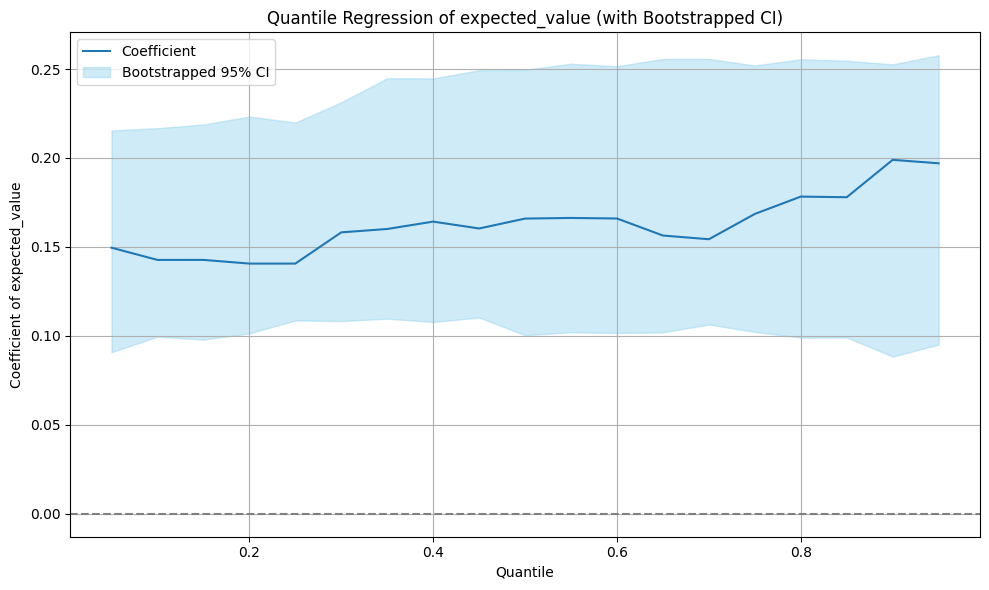


Bootstrapping for variable: avg_top_5_price


  5%|▌         | 1/19 [00:06<01:49,  6.06s/it]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations 

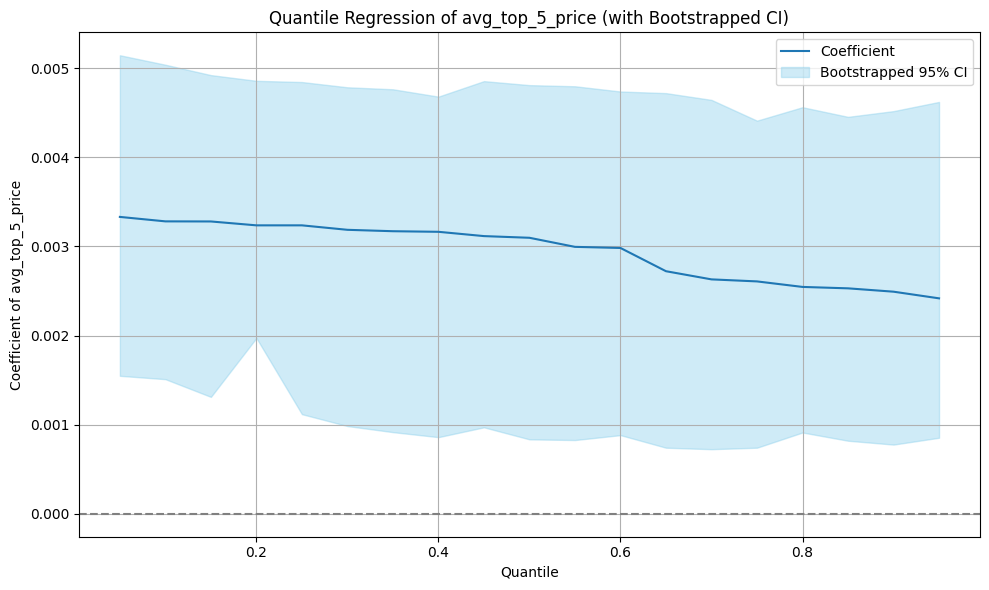


Bootstrapping for variable: set_age


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str

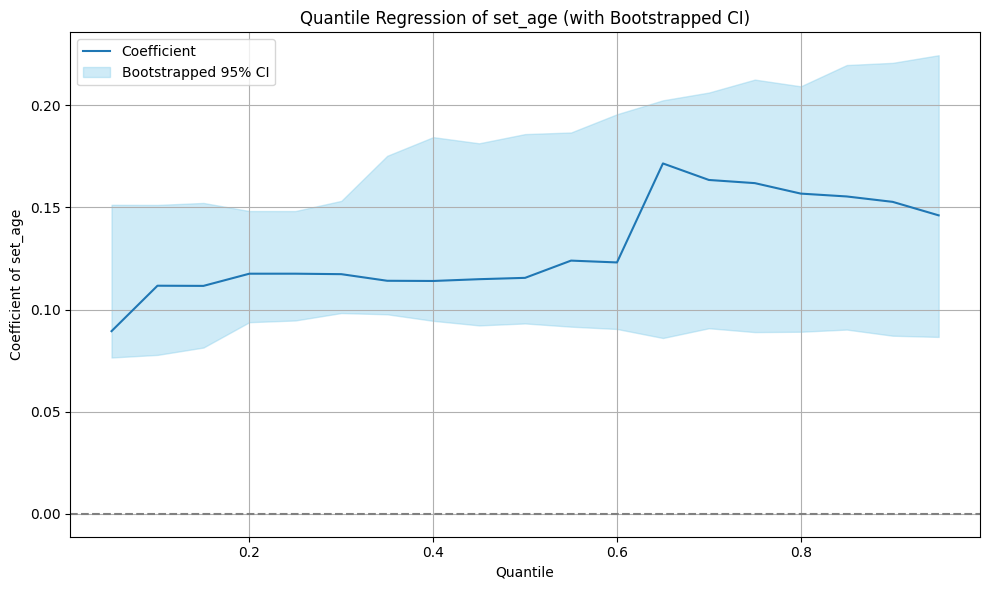


Bootstrapping for variable: is_special_set


  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\Users\janhr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str

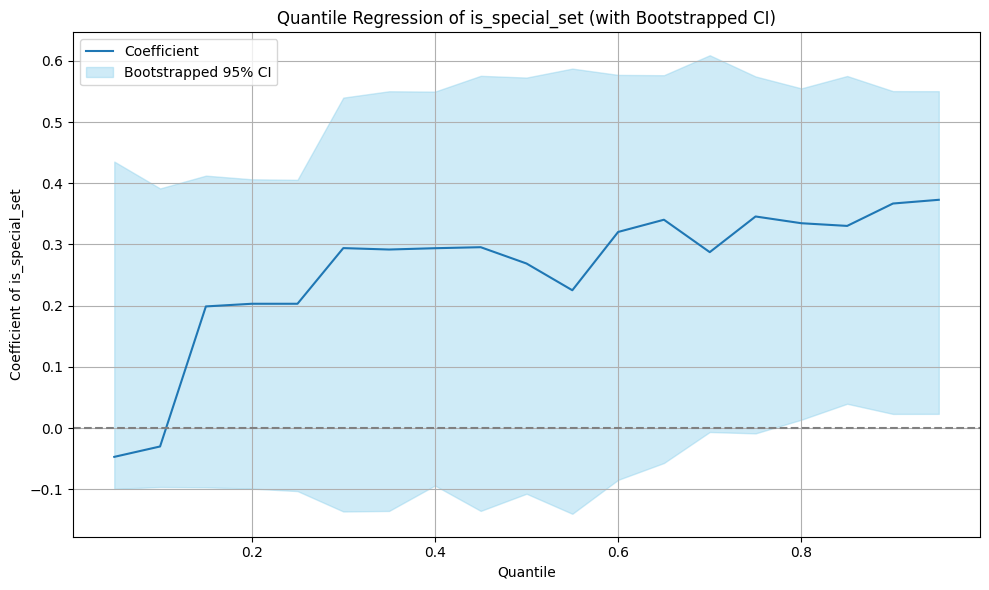

In [43]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm import tqdm

# Settings
formula = 'log_booster_price ~ expected_value + avg_top_5_price + set_age + is_special_set'
variables = ['expected_value', 'avg_top_5_price', 'set_age', 'is_special_set']
quantiles = np.arange(0.05, 0.96, 0.05)
n_bootstraps = 1000  # You can reduce to 500 if it's slow
random_seed = 42

# Set seed for reproducibility
np.random.seed(random_seed)

for var in variables:
    coef_values = []
    lower_bounds = []
    upper_bounds = []

    print(f"\nBootstrapping for variable: {var}")
    for q in tqdm(quantiles):
        # Fit model on full data for this quantile
        model = smf.quantreg(formula, data=cross_section_final)
        res = model.fit(q=q)
        coef_values.append(res.params[var])

        # Bootstrap loop
        boot_coefs = []
        for _ in range(n_bootstraps):
            boot_sample = cross_section_final.sample(frac=1, replace=True)
            try:
                boot_model = smf.quantreg(formula, data=boot_sample)
                boot_res = boot_model.fit(q=q, max_iter=1000, disp=False)
                boot_coefs.append(boot_res.params[var])
            except:
                continue  # In case of convergence issues

        # Compute 95% CI
        lower = np.percentile(boot_coefs, 2.5)
        upper = np.percentile(boot_coefs, 97.5)
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(quantiles, coef_values, label='Coefficient')
    plt.fill_between(quantiles, lower_bounds, upper_bounds, color='skyblue', alpha=0.4, label='Bootstrapped 95% CI')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Quantile')
    plt.ylabel(f'Coefficient of {var}')
    plt.title(f'Quantile Regression of {var} (with Bootstrapped CI)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [38]:
# now just bootstrap without log returns - lets see:

In [39]:
# Set seed for reproducibility
np.random.seed(42)


import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy the dataset to keep the outlier
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define the number of bootstrap samples
num_bootstraps = 1000

# Store bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Perform bootstrapping
for i in range(num_bootstraps):
    # Resample the dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define dependent and independent variables for this sample
    y_boot = bootstrap_sample["booster_price"]
    X_boot = bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
    X_boot = sm.add_constant(X_boot)  # Add constant

    # Fit the OLS model
    boot_model = sm.OLS(y_boot, X_boot).fit()

    # Store bootstrapped coefficients
    bootstrap_coefs[i, :] = boot_model.params

# Compute 95% confidence intervals for coefficients
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

# Compute bootstrapped standard errors
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Compute bootstrapped p-values
p_values = np.mean(bootstrap_coefs <= 0, axis=0) * 2  # Two-tailed test

# Create a DataFrame with the bootstrap results
bootstrap_results3 = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_log2.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

bootstrap_results3

,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,0.342418,-7.462695,1.904638,-11.154575,-4.060331,2.000
1,expected_value,0.159977,2.319112,0.686884,1.076313,3.577850,0.000
2,avg_top_5_price,0.002848,0.040062,0.023340,0.007958,0.099573,0.028
3,set_age,0.145875,0.826283,0.376750,0.096896,1.557993,0.022
4,is_special_set,0.282451,1.690277,2.324431,-2.899329,6.387792,0.470


## the final comparison of the base ols (with outlier, no log transform) and bootstrapping (the same).

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Use the full dataset (with outlier)
cross_section_final_with_outlier2 = cross_section_final.copy()

# Define independent variables
X = cross_section_final_with_outlier2[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]]
X = sm.add_constant(X)

# Define dependent variable (no log-transform)
y = cross_section_final_with_outlier2["booster_price"]

# Fit the original linear model (for reference)
final_model_linear = sm.OLS(y, X).fit()

# Number of bootstrap samples
num_bootstraps = 1000

# Storage for bootstrapped coefficients
bootstrap_coefs = np.zeros((num_bootstraps, len(X.columns)))

# Bootstrapping loop
for i in range(num_bootstraps):
    # Resample dataset with replacement
    bootstrap_sample = cross_section_final_with_outlier2.sample(n=len(cross_section_final_with_outlier2), replace=True)

    # Define X and y for the bootstrap sample
    X_boot = sm.add_constant(bootstrap_sample[["expected_value", "avg_top_5_price", "set_age", "is_special_set"]])
    y_boot = bootstrap_sample["booster_price"]

    # Fit the model and store coefficients
    boot_model = sm.OLS(y_boot, X_boot).fit()
    bootstrap_coefs[i, :] = boot_model.params.values

# Compute bootstrap statistics
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)
bootstrap_std_err = np.std(bootstrap_coefs, axis=0)

# Two-tailed bootstrapped p-values (clipped at 1)
p_values = 2 * np.minimum(
    np.mean(bootstrap_coefs <= 0, axis=0),
    np.mean(bootstrap_coefs > 0, axis=0)
)

# Combine results into a DataFrame
bootstrap_results_linear = pd.DataFrame({
    "Variable": X.columns,
    "Original Coefficient": final_model_linear.params.values,
    "Bootstrap Mean": np.mean(bootstrap_coefs, axis=0),
    "Bootstrap Std Err": bootstrap_std_err,
    "95% CI Lower": lower_bounds,
    "95% CI Upper": upper_bounds,
    "Bootstrapped p-value": p_values
})

# Display the results
bootstrap_results_linear


,Variable,Original Coefficient,Bootstrap Mean,Bootstrap Std Err,95% CI Lower,95% CI Upper,Bootstrapped p-value
0,const,-8.245180,-7.462695,1.904638,-11.154575,-4.060331,0.000
1,expected_value,2.604191,2.319112,0.686884,1.076313,3.577850,0.000
2,avg_top_5_price,0.035492,0.040062,0.023340,0.007958,0.099573,0.028
3,set_age,0.813797,0.826283,0.376750,0.096896,1.557993,0.022
4,is_special_set,1.495835,1.690277,2.324431,-2.899329,6.387792,0.470
